In [1]:
import pandas as pd
import numpy as np

In [2]:
raw_df1 = pd.read_csv("data/data_1.csv", delimiter=';', engine = 'python')
raw_df2 = pd.read_csv("data/data_2.csv", delimiter=';', engine = 'python')
df = pd.read_csv(r"C:\Users\acer\Desktop\en-guncel-health-data\DEU-DATATHON-main\state_populations.csv")
state_pop_df = pd.Series(df["Population"].values, index=df["State"])


In [3]:
raw_df1["Week Ending Date"] = raw_df1["Week Ending Date"].str.replace(".", "/", regex=False)
raw_df1["Week Ending Date"] = pd.to_datetime(raw_df1["Week Ending Date"], format="%m/%d/%Y", errors="coerce")
raw_df2["Week Ending Date"] = raw_df2["Week Ending Date"].str.replace(".", "/", regex=False)
raw_df2["Week Ending Date"] = pd.to_datetime(raw_df2["Week Ending Date"], format="%d/%m/%Y", errors="coerce")

In [4]:
raw_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16902 entries, 0 to 16901
Data columns (total 30 columns):
 #   Column                                                                                             Non-Null Count  Dtype         
---  ------                                                                                             --------------  -----         
 0   Jurisdiction of Occurrence                                                                         16902 non-null  object        
 1   MMWR Year                                                                                          16902 non-null  int64         
 2   MMWR Week                                                                                          16902 non-null  int64         
 3   Week Ending Date                                                                                   16902 non-null  datetime64[ns]
 4   All  Cause                                                                  

In [5]:
raw_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10476 entries, 0 to 10475
Data columns (total 35 columns):
 #   Column                                                                                             Non-Null Count  Dtype         
---  ------                                                                                             --------------  -----         
 0   Data As Of                                                                                         10476 non-null  object        
 1   Jurisdiction of Occurrence                                                                         10476 non-null  object        
 2   MMWR Year                                                                                          10476 non-null  int64         
 3   MMWR Week                                                                                          10476 non-null  int64         
 4   Week Ending Date                                                            

In [6]:
'''
!pip install numba==0.53.1
!pip install ydata-profiling
!pip install visions --upgrade
!pip install ydata-profiling --upgrade

from ydata_profiling import ProfileReport

profile = ProfileReport(raw_df1)
profile.to_notebook_iframe()
'''

'\n!pip install numba==0.53.1\n!pip install ydata-profiling\n!pip install visions --upgrade\n!pip install ydata-profiling --upgrade\n\nfrom ydata_profiling import ProfileReport\n\nprofile = ProfileReport(raw_df1)\nprofile.to_notebook_iframe()\n'

In [7]:
'''
profile = ProfileReport(raw_df2)
profile.to_notebook_iframe()
'''

'\nprofile = ProfileReport(raw_df2)\nprofile.to_notebook_iframe()\n'

In [8]:
columns_to_hold_df1 = ['Jurisdiction of Occurrence',
       'Week Ending Date', 'Septicemia (A40-A41)',
       'Influenza and pneumonia (J10-J18)']

columns_to_hold_df2 = ['Jurisdiction of Occurrence',
       'Week Ending Date', 'Septicemia (A40-A41)',
       'Influenza and pneumonia (J09-J18)']

In [9]:
filtered_raw_df1 = raw_df1[columns_to_hold_df1]
filtered_raw_df1.head()

Jurisdiction of Occurrence Week Ending Date Septicemia (A40-A41)  \
0                    Florida       2014-10-25                   38   
1                    Florida       2014-11-01                   43   
2                    Florida       2014-11-08                   44   
3                    Florida       2014-11-15                   43   
4                    Florida       2014-11-22                   39   

  Influenza and pneumonia (J10-J18)  
0                                36  
1                                60  
2                                48  
3                                51  
4                                63

In [10]:
filtered_raw_df2 = raw_df2[columns_to_hold_df2]
filtered_raw_df2.head()

Jurisdiction of Occurrence Week Ending Date  Septicemia (A40-A41)  \
0              United States       2020-01-04                 843.0   
1              United States       2020-01-11                 861.0   
2              United States       2020-01-18                 829.0   
3              United States       2020-01-25                 828.0   
4              United States       2020-02-01                 811.0   

  Influenza and pneumonia (J09-J18)  
0                             1,559  
1                             1,528  
2                             1,484  
3                             1,488  
4                             1,411

In [11]:
filtered_raw_df1.columns = filtered_raw_df1.columns.str.replace(r"\s*\(.*?\)", "", regex=True).str.strip()
filtered_raw_df1.head()

Jurisdiction of Occurrence Week Ending Date Septicemia  \
0                    Florida       2014-10-25         38   
1                    Florida       2014-11-01         43   
2                    Florida       2014-11-08         44   
3                    Florida       2014-11-15         43   
4                    Florida       2014-11-22         39   

  Influenza and pneumonia  
0                      36  
1                      60  
2                      48  
3                      51  
4                      63

In [12]:
filtered_raw_df2.columns =  filtered_raw_df1.columns.str.replace(r"\s*\(.*?\)", "", regex=True).str.strip()
filtered_raw_df2.head()

Jurisdiction of Occurrence Week Ending Date  Septicemia  \
0              United States       2020-01-04       843.0   
1              United States       2020-01-11       861.0   
2              United States       2020-01-18       829.0   
3              United States       2020-01-25       828.0   
4              United States       2020-02-01       811.0   

  Influenza and pneumonia  
0                   1,559  
1                   1,528  
2                   1,484  
3                   1,488  
4                   1,411

In [13]:
filtered_raw_df1 = filtered_raw_df1[filtered_raw_df2.columns]

merged_df = pd.concat([filtered_raw_df1, filtered_raw_df2], axis=0, ignore_index=True)

In [14]:
merged_df.head()

Jurisdiction of Occurrence Week Ending Date Septicemia  \
0                    Florida       2014-10-25         38   
1                    Florida       2014-11-01         43   
2                    Florida       2014-11-08         44   
3                    Florida       2014-11-15         43   
4                    Florida       2014-11-22         39   

  Influenza and pneumonia  
0                      36  
1                      60  
2                      48  
3                      51  
4                      63

In [15]:
merged_df.shape

(27378, 4)

In [16]:
copy_merged = merged_df.copy()
copy_merged.set_index('Week Ending Date', inplace=True)
copy_merged.head()

Jurisdiction of Occurrence Septicemia Influenza and pneumonia
Week Ending Date                                                              
2014-10-25                          Florida         38                      36
2014-11-01                          Florida         43                      60
2014-11-08                          Florida         44                      48
2014-11-15                          Florida         43                      51
2014-11-22                          Florida         39                      63

In [17]:
copy_merged.dtypes

Jurisdiction of Occurrence    object
Septicemia                    object
Influenza and pneumonia       object
dtype: object

In [18]:
infectious_diseases = ['Septicemia',
                      'Influenza and pneumonia']

for col in infectious_diseases:
    copy_merged[col] = pd.to_numeric(copy_merged[col], errors='coerce')

In [19]:
copy_merged.dtypes

Jurisdiction of Occurrence     object
Septicemia                    float64
Influenza and pneumonia       float64
dtype: object

In [20]:
print(copy_merged.index.all)
columns_to_add = ['Septicemia', 'Influenza and pneumonia']
print(copy_merged[columns_to_add].sum())

<bound method Index.all of DatetimeIndex(['2014-10-25', '2014-11-01', '2014-11-08', '2014-11-15',
               '2014-11-22', '2014-11-29', '2014-12-06', '2014-12-13',
               '2014-12-20', '2014-12-27',
               ...
               '2023-07-15', '2023-07-22', '2023-07-29', '2023-08-05',
               '2023-08-12', '2023-08-19', '2023-08-26', '2023-09-02',
               '2023-09-09', '2023-09-16'],
              dtype='datetime64[ns]', name='Week Ending Date', length=27378, freq=None)>
Septicemia                 742485.0
Influenza and pneumonia    737995.0
dtype: float64


In [21]:
us_filter = copy_merged['Jurisdiction of Occurrence'] == 'United States'
us_dataframe = copy_merged[us_filter]
columns_to_add = ['Septicemia', 'Influenza and pneumonia']
print(us_dataframe[columns_to_add].sum())

Septicemia                 390269.0
Influenza and pneumonia    275435.0
dtype: float64


In [22]:
states_list = copy_merged['Jurisdiction of Occurrence'].dropna().unique().tolist()
states_list = [state for state in states_list if state != "United States"]
print(states_list)

['Florida', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Georgia', 'Hawaii', 'Illinois', 'Idaho', 'Indiana', 'Iowa', 'Kentucky', 'Kansas', 'Louisiana', 'Maine', 'Massachusetts', 'Maryland', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'New Jersey', 'Nevada', 'New Hampshire', 'New Mexico', 'New York', 'New York City', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Virginia', 'Vermont', 'Washington', 'Puerto Rico', 'West Virginia', 'Wisconsin', 'Wyoming']


In [23]:
import ipywidgets as widgets
from IPython.display import display

unique_jurisdiction2 = ['Alabama', 'Alaska', 'Arizona', 'Arkansas',
    'California', 'Colorado', 'Connecticut', 'Delaware',
    'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
    'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
    'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
    'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
    'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
    'New York City', 'North Carolina', 'North Dakota', 'Ohio',
    'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
    'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
    'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin',
    'Wyoming', 'Puerto Rico'
]

dropdown = widgets.Dropdown(
    options=unique_jurisdiction2,
    description='State',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

display(dropdown)


def on_button_clicked(b):
    global state
    state = dropdown.value
    print("Seçilen eyalet:", state)

button = widgets.Button(description="Seçimi Göster")
button.on_click(on_button_clicked)
display(button)

Dropdown(description='State', layout=Layout(width='50%'), options=('Alabama', 'Alaska', 'Arizona', 'Arkansas',…

Button(description='Seçimi Göster', style=ButtonStyle())

In [24]:
import ipywidgets as widgets
from IPython.display import display
import datetime

# Gün, ay, yıl için giriş kutuları (yıl için sınır yok)
day_box = widgets.BoundedIntText(value=1, min=1, max=31, description='Gün:')
month_box = widgets.BoundedIntText(value=1, min=1, max=12, description='Ay:')
year_box = widgets.IntText(value=2020, description='Yıl:')  # Sınır yok

display(day_box, month_box, year_box)

def on_date_button_clicked(b):
    global selected_date
    try:
        selected_date = datetime.date(year_box.value, month_box.value, day_box.value)
        print("Seçilen tarih:", selected_date.strftime("%d-%m-%Y"))
    except Exception as e:
        print("Geçersiz tarih girdiniz:", e)

date_button = widgets.Button(description="Tarihi Göster")
date_button.on_click(on_date_button_clicked)
display(date_button)

BoundedIntText(value=1, description='Gün:', max=31, min=1)

BoundedIntText(value=1, description='Ay:', max=12, min=1)

IntText(value=2020, description='Yıl:')

Button(description='Tarihi Göster', style=ButtonStyle())

In [37]:
print(selected_date)
print(state)

2021-05-19
Florida


In [38]:
import os
from getpass import getpass

# API key'i gizli şekilde kullanıcıdan al
api_key = getpass("OpenAI API Key'inizi girin: ")

In [39]:
os.environ["OPENAI_API_KEY"] = api_key

In [40]:
%pip install openai langchain-community langchain-core python-dotenv

Note: you may need to restart the kernel to use updated packages.


In [41]:
import re
from ast import literal_eval
import pandas as pd
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-4.1-nano", temperature=0.3)


In [42]:
def extract_list_from_response(response: str) -> list[str]:
    try:
        code_blocks = re.findall(r"```python\n(.*?)\n```", response, re.DOTALL)
        if code_blocks:
            return literal_eval(code_blocks[0])
        list_text = re.search(r"\[.*?\]", response)
        if list_text:
            return literal_eval(list_text.group(0))
    except Exception as e:
        print("Liste çıkarma hatası:", e)
    return []


In [43]:
def get_similar_states_with_death_rates(
    user_state: str,
    states: list[str],
    date: str,
    death_df: pd.DataFrame,
    pop_df: pd.Series,
    disease_cols: list[str]
) -> list[tuple[str, float]]:

    prompt = f"""
Aşağıda listesi verilen ABD eyaletleri içinde, {user_state} eyaletine {date} tarihinde
iklim, coğrafya ve kültürel yapı açısından en çok benzeyen 3 tanesini sırala.

Bu tarihteki mevsimsel koşulları da dikkate al.

Eyalet listesi: {states}

Yalnızca Python listesi formatında 3 eyalet döndür: örneğin ["Arizona", "Nevada", "New Mexico"]
"""

    try:
        response = llm.invoke(prompt).content
        similar_states = extract_list_from_response(response)

        results = []
        for state in similar_states:
            try:
                total_deaths = death_df.loc[
                    death_df["Jurisdiction of Occurrence"] == state,
                    disease_cols
                ].dropna().sum().sum()

                population = pop_df[state]
                rate = total_deaths / population
                results.append((state, round(rate, 5)))
            except Exception as inner_e:
                print(f"{state} için oran hesaplanamadı:", inner_e)

        return results

    except Exception as e:
        print("Benzer eyalet tahmini hatası:", e)
        return []


In [45]:
death_rates = get_similar_states_with_death_rates(
    user_state=state,
    states=states_list,
    date=selected_date,
    death_df=copy_merged,
    pop_df=state_pop_df,
    disease_cols=["Influenza and pneumonia", "Septicemia"]
)



🔍 Florida için 2021-05-19 tarihinde benzer eyaletlerin ölüm oranları:

• Louisiana: 0.00303
• Georgia: 0.00285
• South Carolina: 0.00214


In [30]:
filtered_df = copy_merged[copy_merged['Jurisdiction of Occurrence'].isin(states)]

In [31]:
filtered_df_1 = copy_merged[copy_merged['Jurisdiction of Occurrence'] == states[0]]
filtered_df_2 = copy_merged[copy_merged['Jurisdiction of Occurrence'] == states[1]]
filtered_df_3 = copy_merged[copy_merged['Jurisdiction of Occurrence'] == states[2]]
filtered_df_4 = copy_merged[copy_merged['Jurisdiction of Occurrence'] == states[3]]

In [32]:
filtered_df_1

Jurisdiction of Occurrence  Septicemia  \
Week Ending Date                                          
2014-01-04                          Alabama        26.0   
2014-01-11                          Alabama        30.0   
2014-01-18                          Alabama        21.0   
2014-01-25                          Alabama        25.0   
2014-02-01                          Alabama        18.0   
...                                     ...         ...   
2023-08-19                          Alabama        17.0   
2023-08-26                          Alabama        15.0   
2023-09-02                          Alabama        16.0   
2023-09-09                          Alabama        16.0   
2023-09-16                          Alabama        11.0   

                  Influenza and pneumonia  
Week Ending Date                           
2014-01-04                           38.0  
2014-01-11                           37.0  
2014-01-18                           34.0  
2014-01-25                           42.0  
2014-02-01                           26.0  
...                                   ...  
2023-08-19                           13.0  
2023-08-26                           18.0  
2023-09-02                           12.0  
2023-09-09                           13.0  
2023-09-16                            NaN  

[507 rows x 3 columns]

In [33]:
# Rastgeleliğin tekrarlanabilir olması için
np.random.seed(42)

def generate_imputed_value(katsayi):
    if katsayi >= 0.7:
        return np.random.randint(1, 3)
    elif 0.4 <= katsayi < 0.7:
        return np.random.randint(3, 6)
    else:  # katsayi < 0.4
        return np.random.randint(6, 10)

# Dört DataFrame'i işleyen ve NaN'leri diğer eyaletlerle orantılı şekilde dolduran fonksiyon
def fill_missing_across_states(dfs, group_col, cols_to_fill):
    # Tüm DataFrame'leri birleştir
    combined_df = pd.concat(dfs, ignore_index=True)
    filled_df_list = []

    for df in dfs:
        filled_df = df.copy()

        for col in cols_to_fill:
            # Her eyalet için NaN sayısını al
            nan_counts = combined_df.groupby(group_col)[col].apply(lambda x: x.isna().sum())
            total_nan = nan_counts.sum()

            for state in df[group_col].unique():
                state_mask = (df[group_col] == state)
                state_nan_count = df.loc[state_mask, col].isna().sum()

                if total_nan != 0:
                    katsayi = 1 - (nan_counts[state] / total_nan)

                # NaN hücre sayısı kadar rastgele değer üret
                filled_values = [generate_imputed_value(katsayi) for _ in range(state_nan_count)]

                # Bu değerlerle doldur
                filled_df.loc[state_mask & df[col].isna(), col] = filled_values

        filled_df_list.append(filled_df)

    return filled_df_list



In [34]:
dfs = [filtered_df_1, filtered_df_2, filtered_df_3, filtered_df_4]
group_col = 'Jurisdiction of Occurrence'
cols_to_fill = ['Septicemia', 'Influenza and pneumonia']

filled_dfs = fill_missing_across_states(dfs, group_col, cols_to_fill)

# Sonuçları ayrı ayrı alabilirsin
filled_df_1, filled_df_2, filled_df_3, filled_df_4 = filled_dfs

In [35]:
print("SÜTUNLARDAKİ NaN (EKSİK) DEĞERLER DOLDURULDUKTAN SONRA:")
print("Eyalet: " +  filled_df_1['Jurisdiction of Occurrence'].unique()[0])
print(filled_df_1.isna().sum().sort_values(ascending=False))
print("------------------------------------------------")
print("Eyalet: " +  filled_df_2['Jurisdiction of Occurrence'].unique()[0])
print(filled_df_2.isna().sum().sort_values(ascending=False))
print("------------------------------------------------")
print("Eyalet: " +  filled_df_3['Jurisdiction of Occurrence'].unique()[0])
print(filled_df_3.isna().sum().sort_values(ascending=False))
print("------------------------------------------------")
print("Eyalet: " +  filled_df_4['Jurisdiction of Occurrence'].unique()[0])
print(filled_df_4.isna().sum().sort_values(ascending=False))

SÜTUNLARDAKİ NaN (EKSİK) DEĞERLER DOLDURULDUKTAN SONRA:
Eyalet: Alabama
Jurisdiction of Occurrence    0
Septicemia                    0
Influenza and pneumonia       0
dtype: int64
------------------------------------------------
Eyalet: Georgia
Jurisdiction of Occurrence    0
Septicemia                    0
Influenza and pneumonia       0
dtype: int64
------------------------------------------------
Eyalet: Mississippi
Jurisdiction of Occurrence    0
Septicemia                    0
Influenza and pneumonia       0
dtype: int64
------------------------------------------------
Eyalet: Louisiana
Jurisdiction of Occurrence    0
Septicemia                    0
Influenza and pneumonia       0
dtype: int64


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
from matplotlib.ticker import MultipleLocator

def plot_disease_trend(dataframe, disease_name, color="#d81b60"):
    """
    Herhangi bir eyalet ve hastalık için detaylı grafik oluşturan fonksiyon.

    Parametreler:
        dataframe (pd.DataFrame): İşlenecek veri çerçevesi.
        disease_name (str): Grafiği çizilecek hastalık adı.
        color (str): Grafikte kullanılacak renk (varsayılan: #d81b60).

    Dönüş:
        fig, ax: Oluşturulan grafik figürü ve ekseni.
    """
    df_melted = dataframe.reset_index().melt(
        id_vars=['Week Ending Date', 'Jurisdiction of Occurrence'],
        value_vars=[disease_name],
        var_name='Disease',
        value_name='Count'
    )

    disease_data = df_melted[df_melted['Disease'] == disease_name]
    jurisdiction = dataframe['Jurisdiction of Occurrence'].iloc[0]
    dates = disease_data['Week Ending Date']

    plt.style.use('default')
    fig, ax = plt.subplots(figsize=(20, 10), dpi=120)

    ax.plot(dates, disease_data['Count'], linewidth=2.5, color=color, alpha=1)
    ax.fill_between(dates, disease_data['Count'], alpha=0.25, color=color)

    # Zaman boşluğu bölgesi (varsa)
    try:
        # Tarihleri sırala
        sorted_dates = sorted(dates)
        gaps = []

        # Tarihlerdeki boşlukları tespit et
        for i in range(1, len(sorted_dates)):
            current_date = sorted_dates[i]
            prev_date = sorted_dates[i-1]
            date_diff = (current_date - prev_date).days

            # 30 günden fazla boşluk varsa kaydet
            if date_diff > 30:
                gaps.append((prev_date, current_date))

        # Bulunan boşlukları grafikte göster
        for gap_start, gap_end in gaps:
            ax.axvspan(gap_start, gap_end, alpha=0.1, color='gray', zorder=1)

            gap_center = gap_start + (gap_end - gap_start) / 2
            ax.text(
                gap_center, disease_data['Count'].max() * 0.3,
                'Zaman Boşluğu',
                ha='center', va='center',
                fontsize=14, fontweight='bold',
                bbox=dict(facecolor='white', alpha=0.9, boxstyle='round,pad=0.7',
                          edgecolor='black', linewidth=1.5)
            )
    except Exception as e:
        pass  # Zaman boşluğu hesaplamasında hata olursa atla

    # X ekseni tarih ayarları
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
    ax.tick_params(axis='x', which='minor', length=4)
    ax.tick_params(axis='x', which='major', length=8)

    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)

    # Y eksenini 5'er birim arttır
    ax.yaxis.set_major_locator(MultipleLocator(5))

    ax.set_ylabel('Vaka Sayısı', fontsize=16, fontweight='bold', labelpad=15)
    ax.set_xlabel('Tarih', fontsize=16, fontweight='bold', labelpad=15)
    ax.set_title(f'{disease_name} Vakaları - {jurisdiction}', fontsize=22, fontweight='bold', pad=20)
    ax.set_ylim(bottom=0)

    ax.grid(True, which='major', linestyle='-', linewidth=0.8, alpha=0.5)
    ax.grid(True, which='minor', linestyle=':', linewidth=0.5, alpha=0.3)

    for spine in ax.spines.values():
        spine.set_linewidth(1.5)

    plt.tight_layout()
    plt.subplots_adjust(bottom=0.15)

    return fig, ax

In [37]:
def plot_all_diseases_for_dataframes(dataframe_list, disease_list, colors=None):
    """
    Veri çerçevesi ve hastalık listesi için grafikleri oluşturan fonksiyon.

    Parametreler:
        dataframe_list (list): Veri çerçevesi listesi.
        disease_list (list): Hastalık adlarının listesi.
        colors (list): Renk listesi (isteğe bağlı).
    """
    if colors is None:
        colors = ["#1e88e5", "#d81b60", "#43a047", "#ff9800", "#5e35b1"]

    for dataframe in dataframe_list:
        jurisdiction = dataframe['Jurisdiction of Occurrence'].iloc[0]

        for i, disease in enumerate(disease_list):
            color = colors[i % len(colors)]
            try:
                fig, ax = plot_disease_trend(dataframe, disease, color=color)
                plt.show()
                plt.close(fig)
            except Exception as e:
                print(f"Hata oluştu ({jurisdiction}, {disease}): {e}")


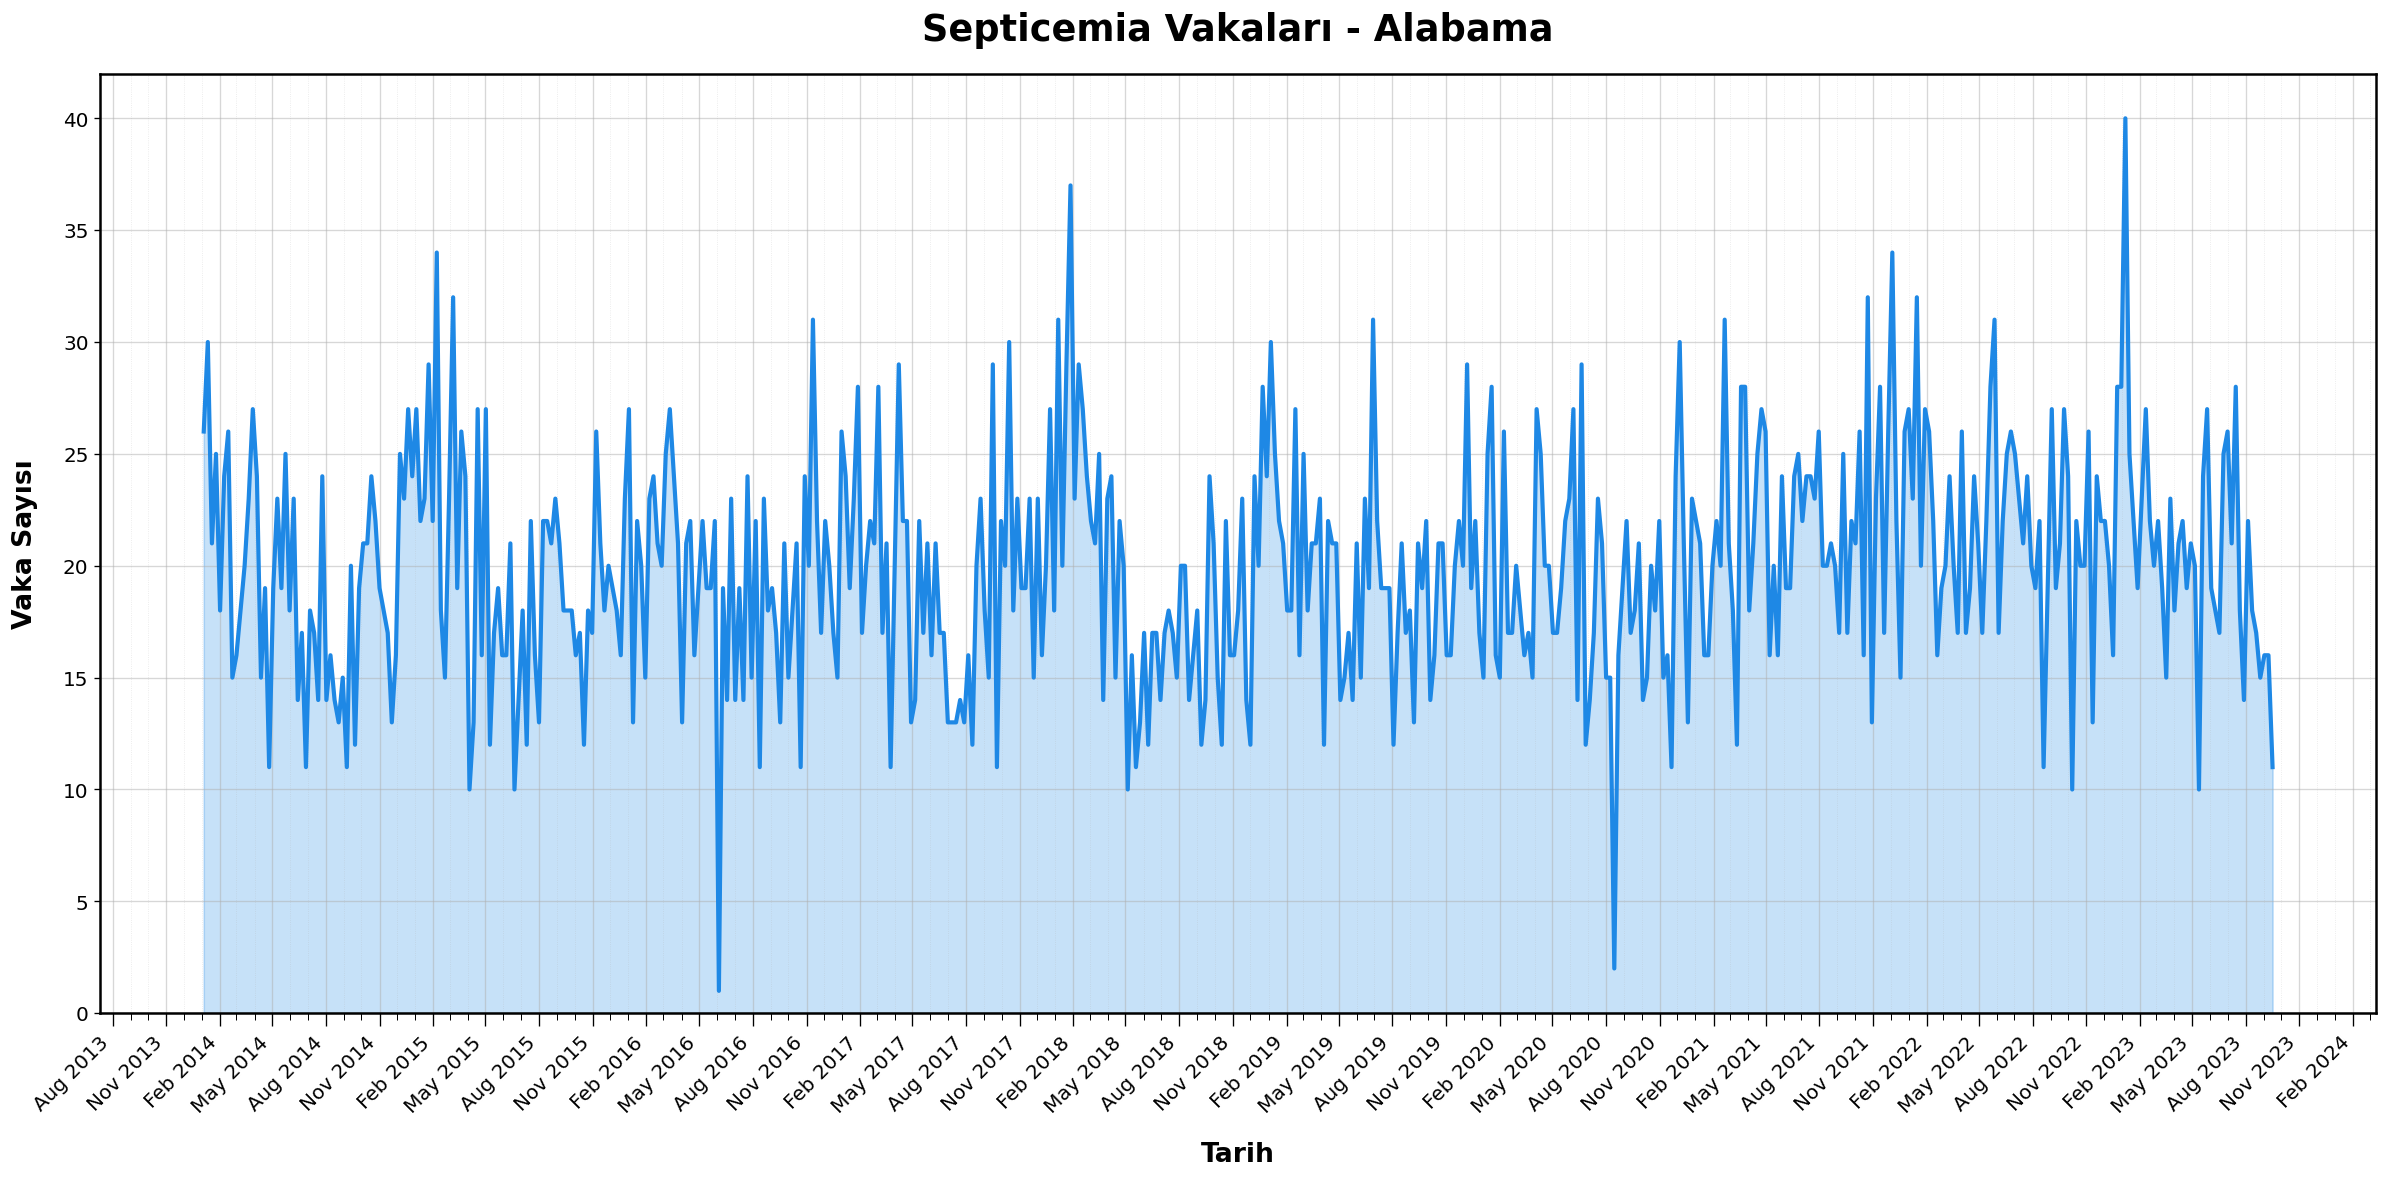

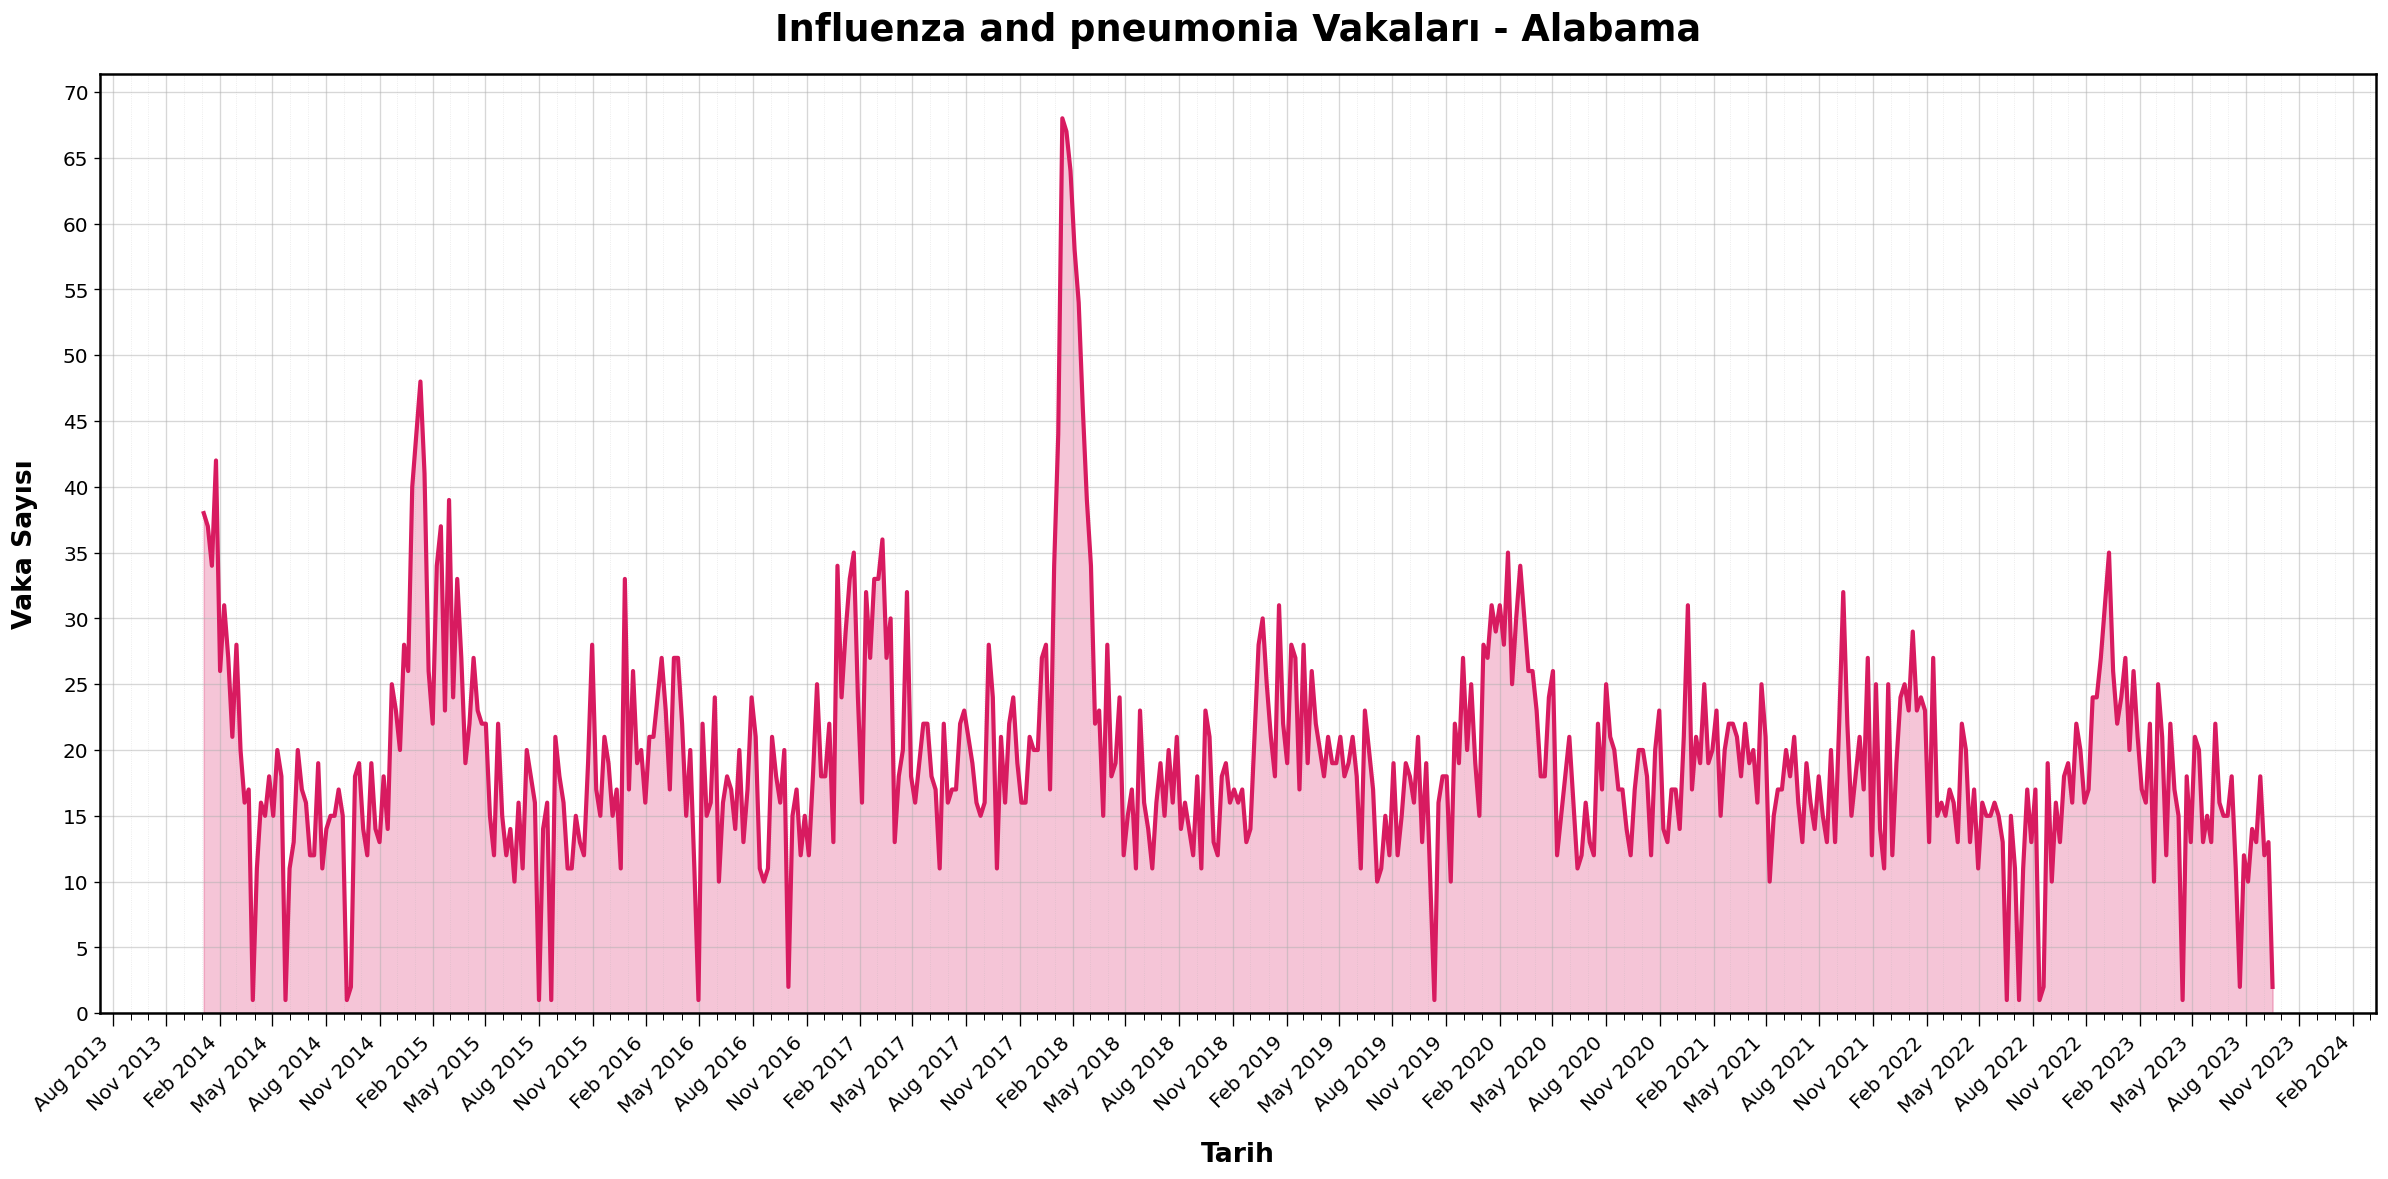

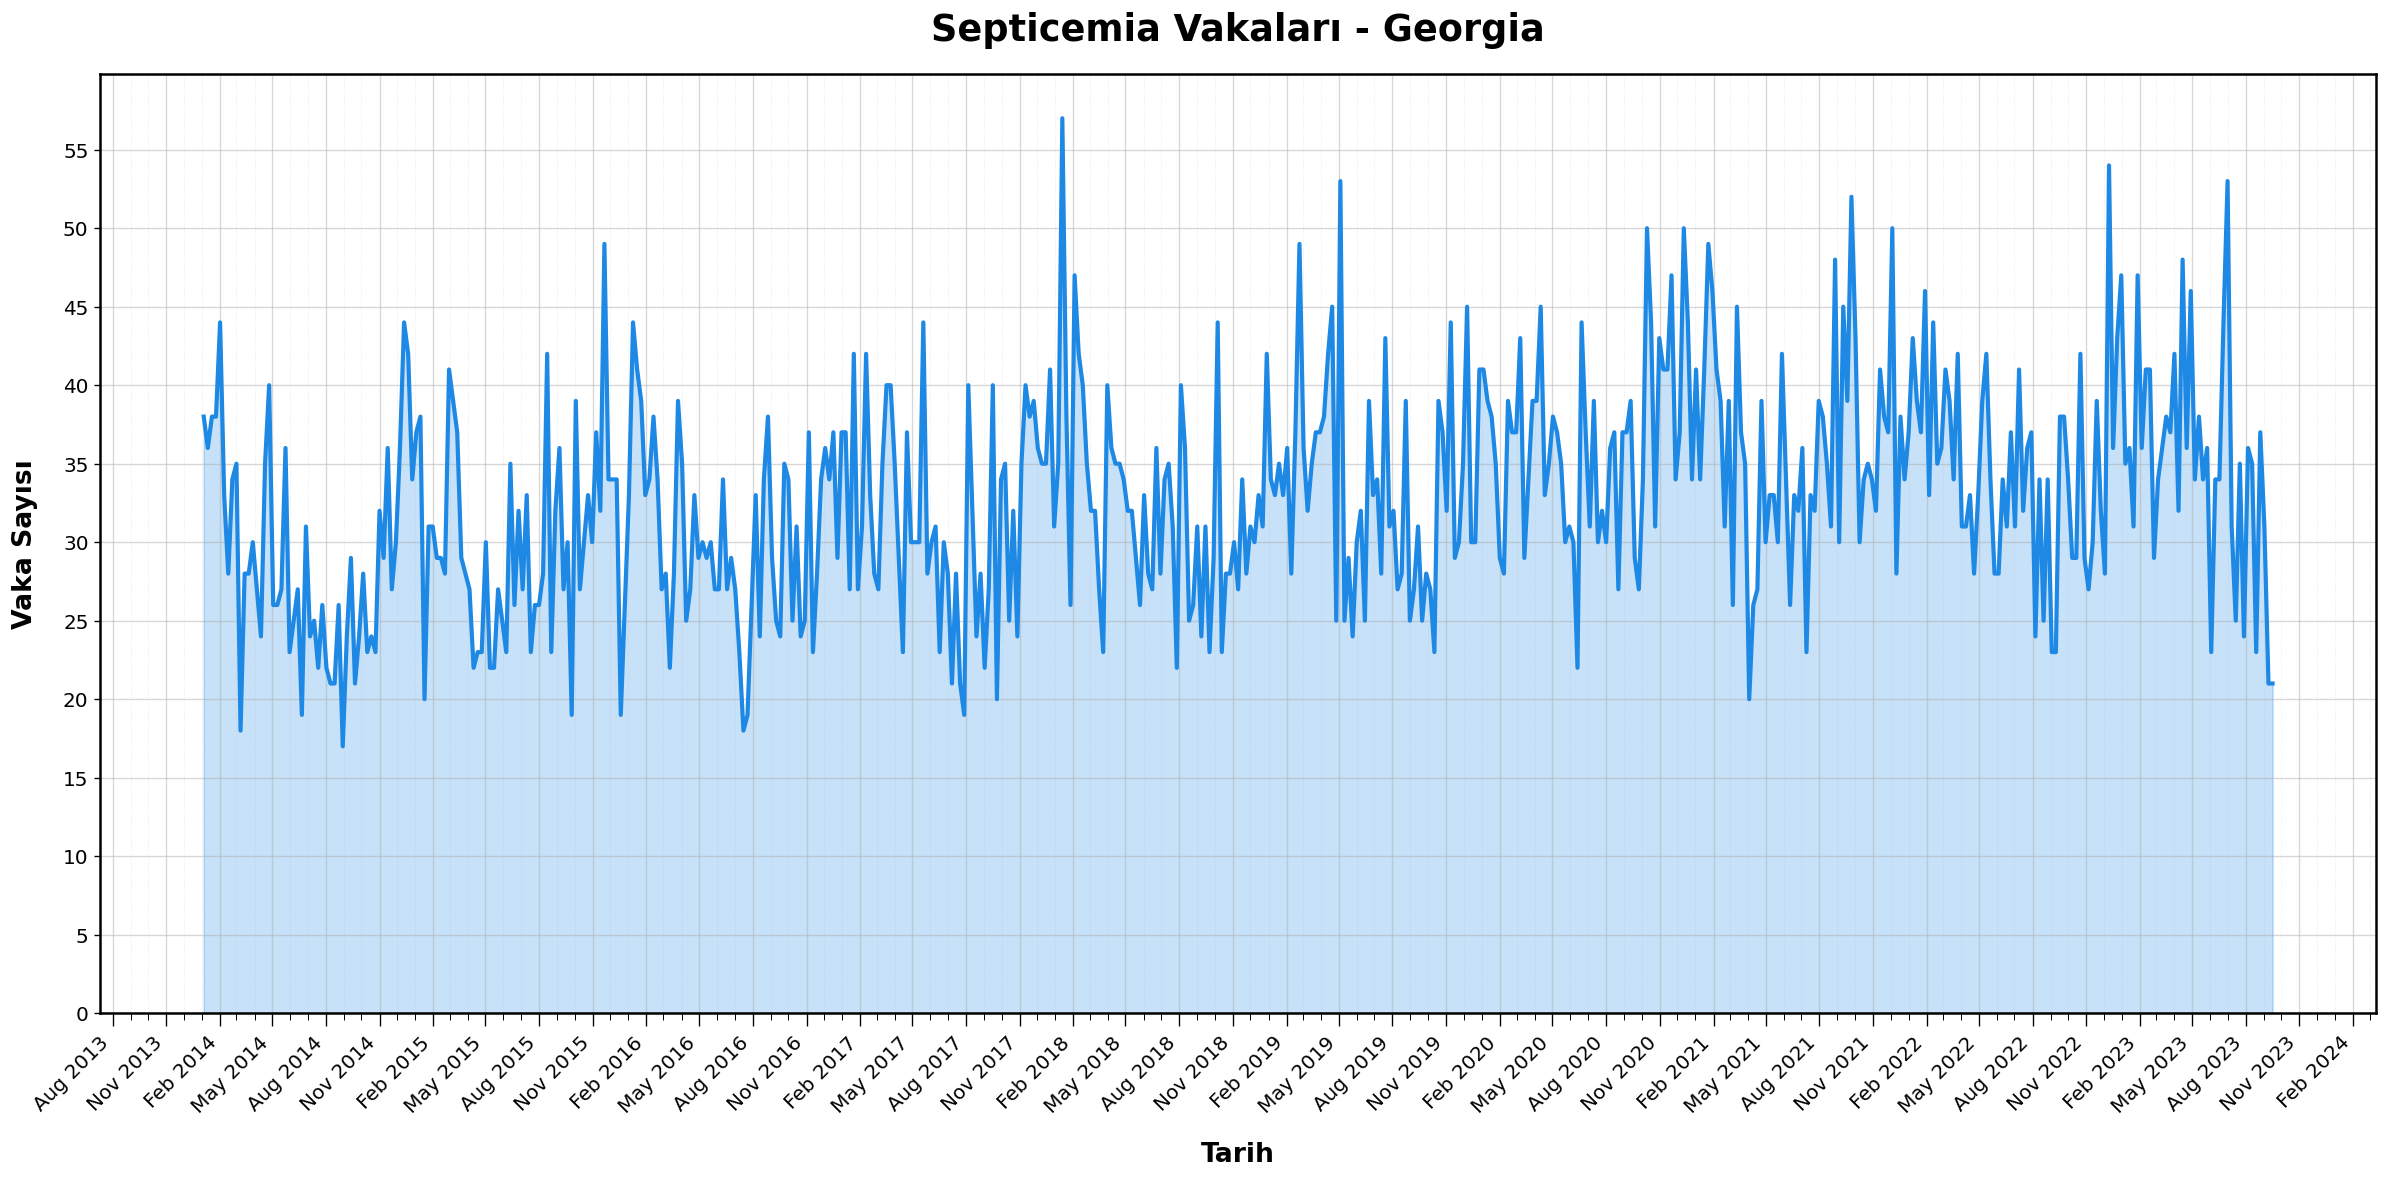

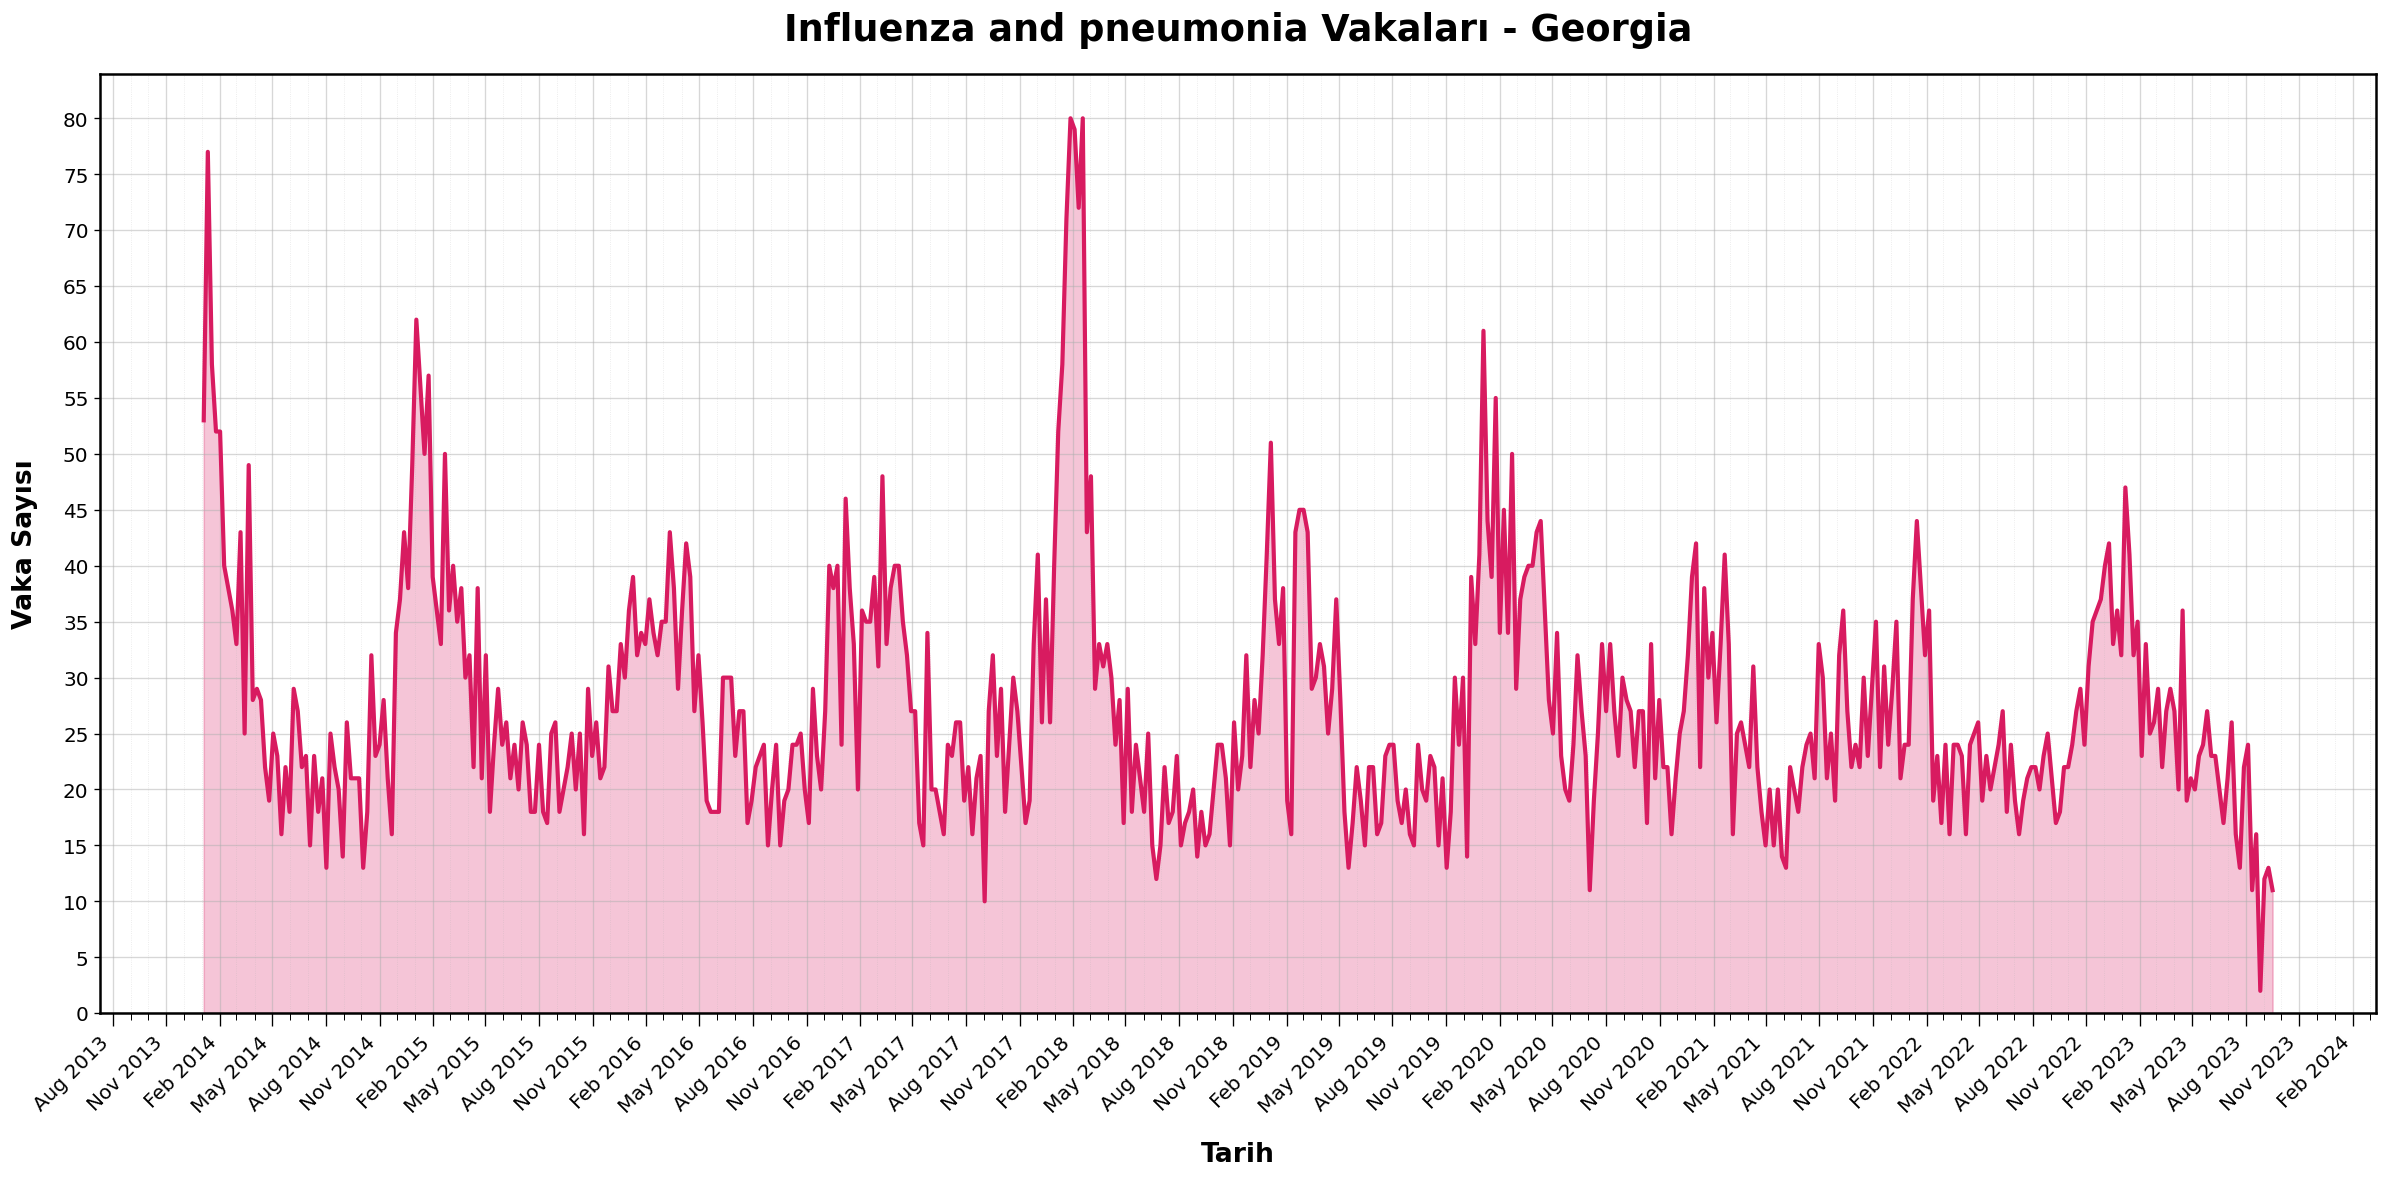

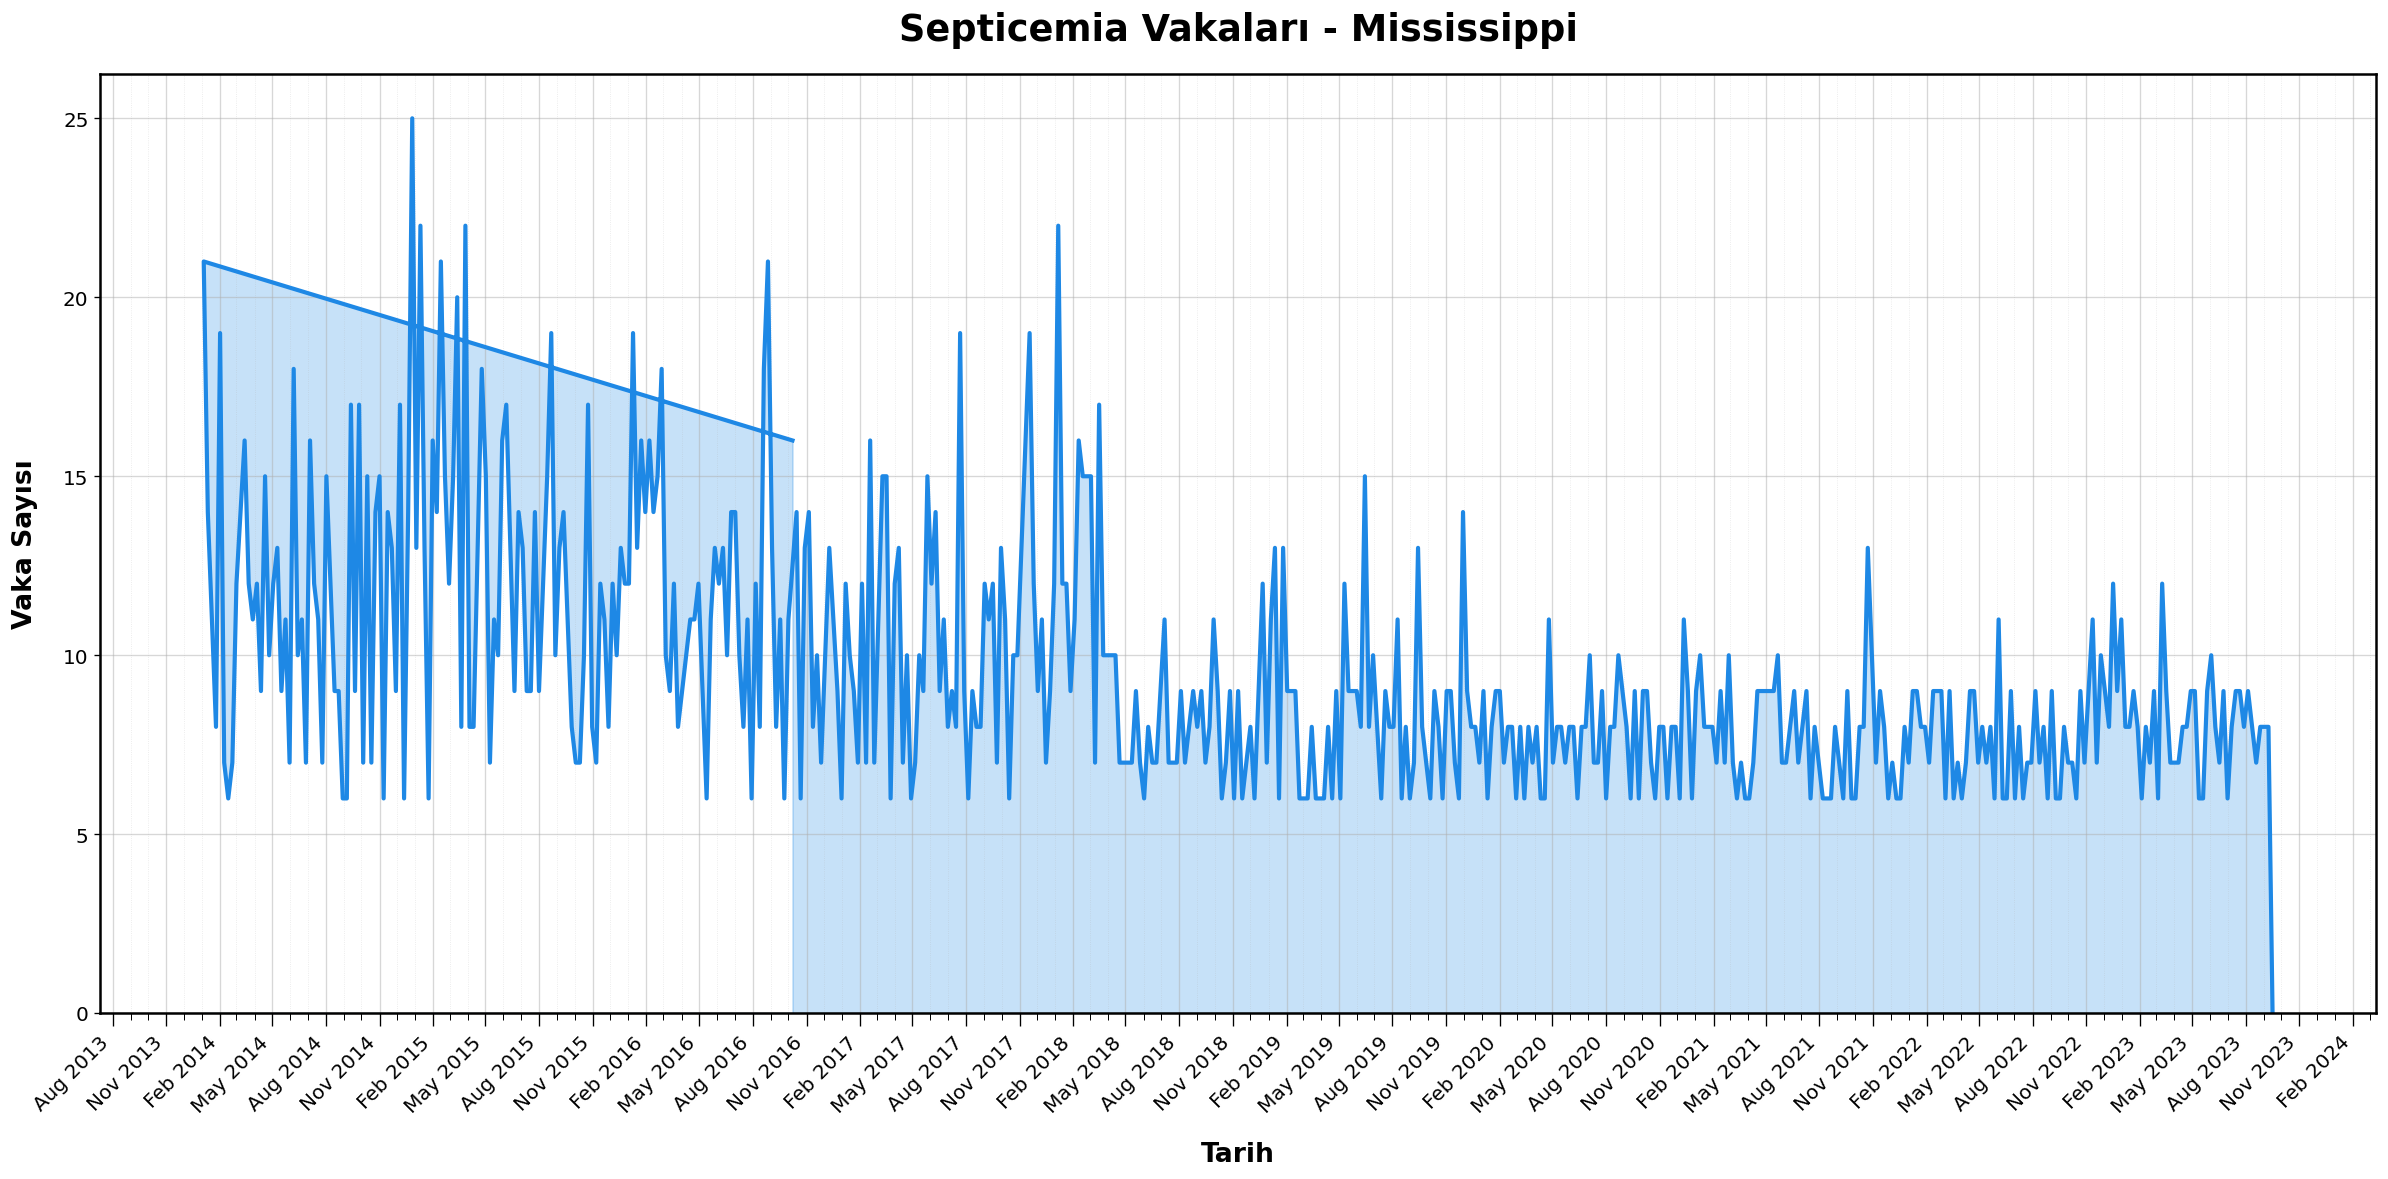

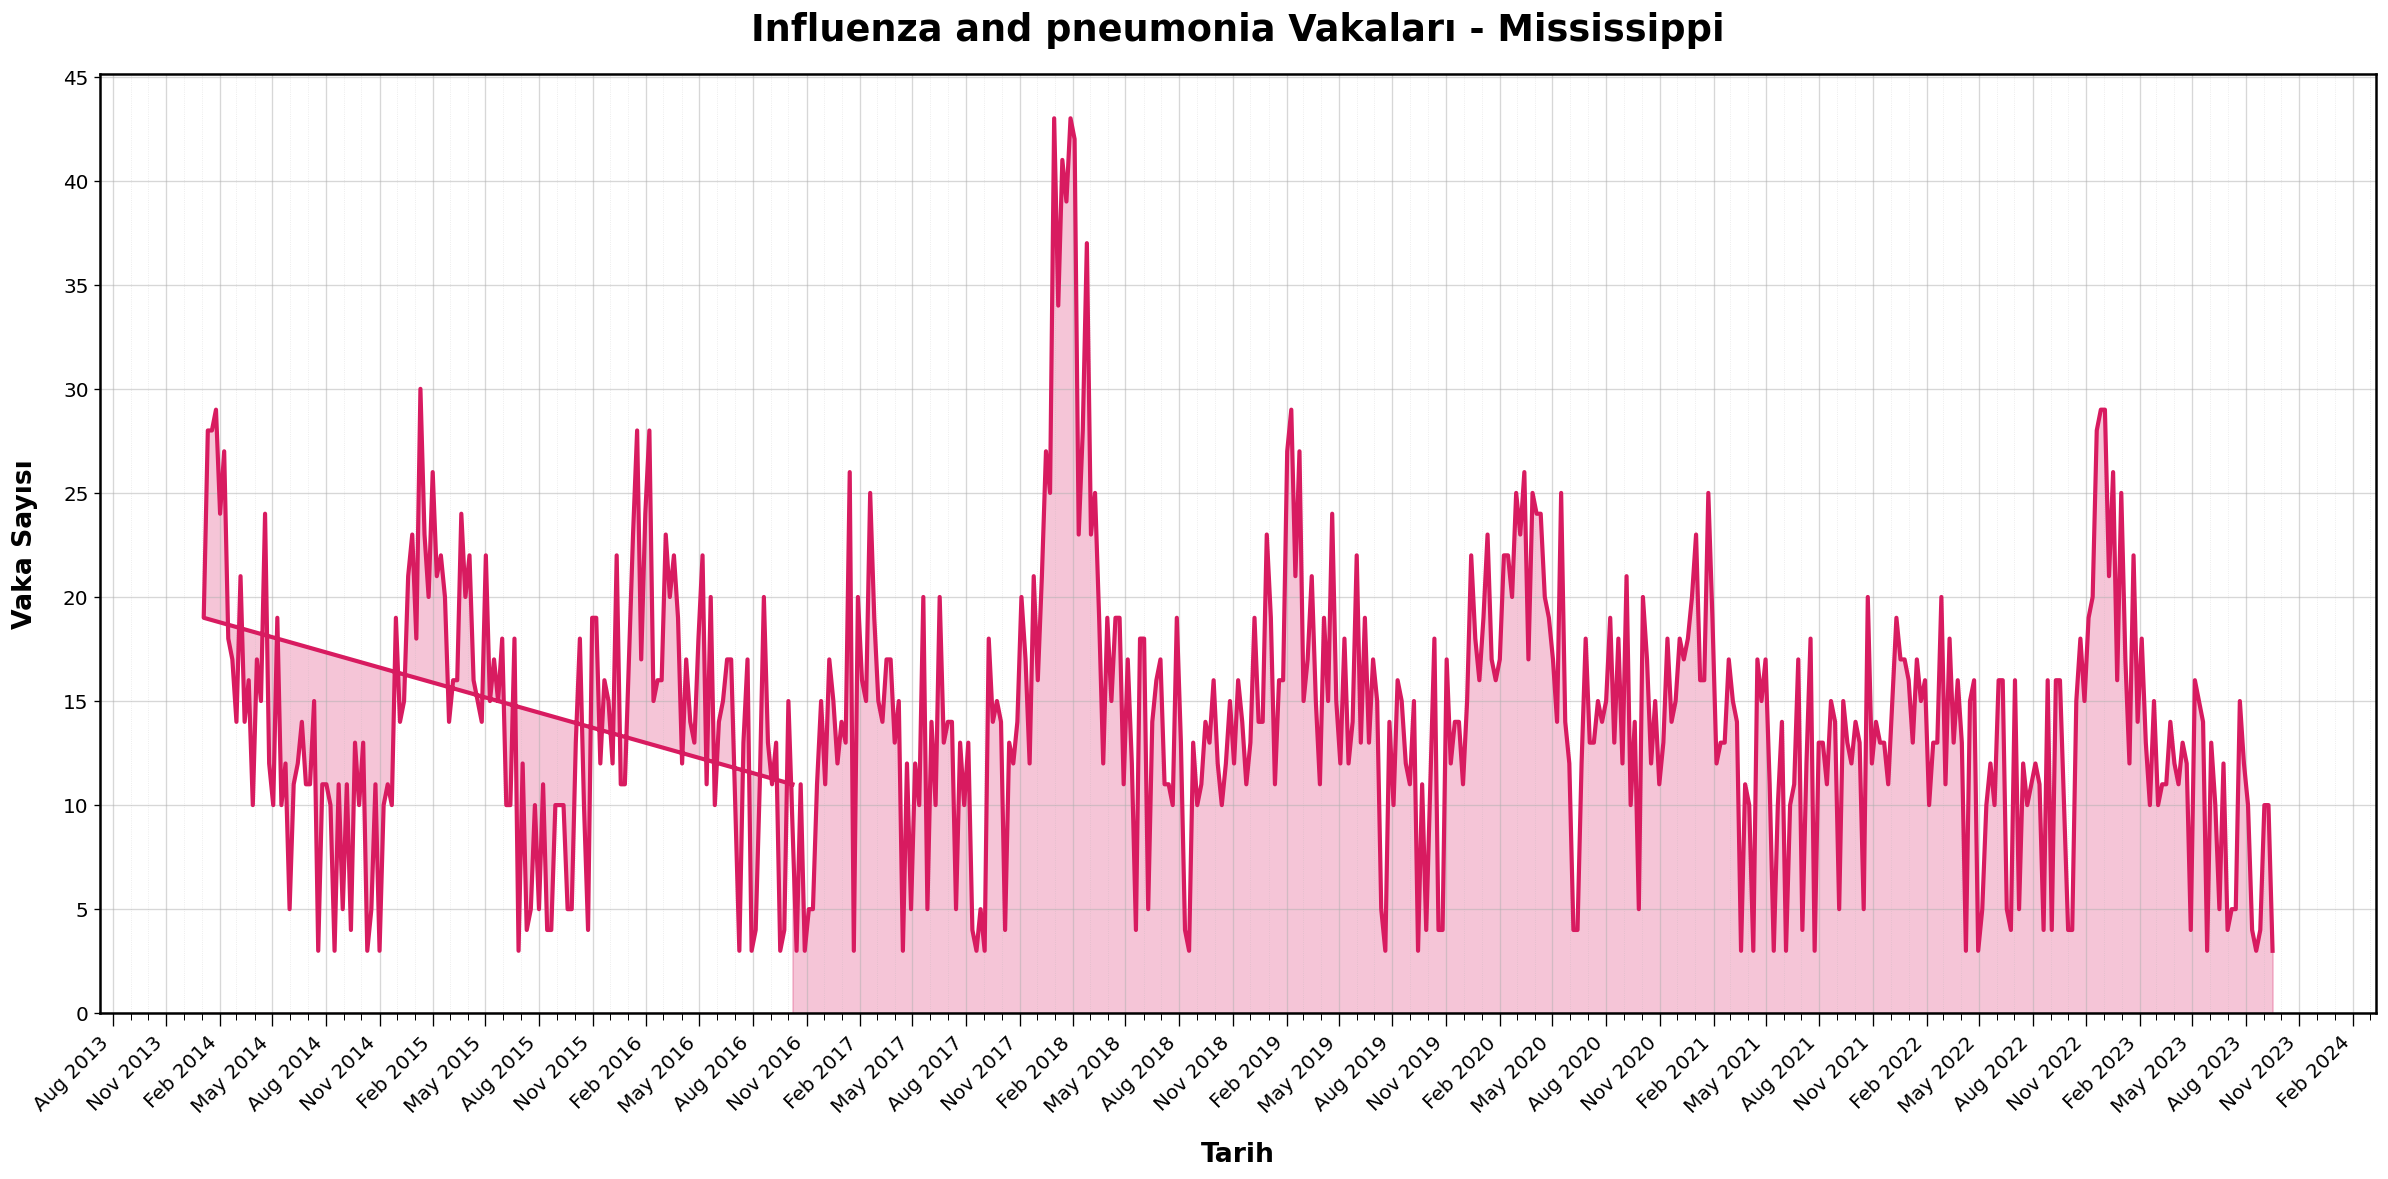

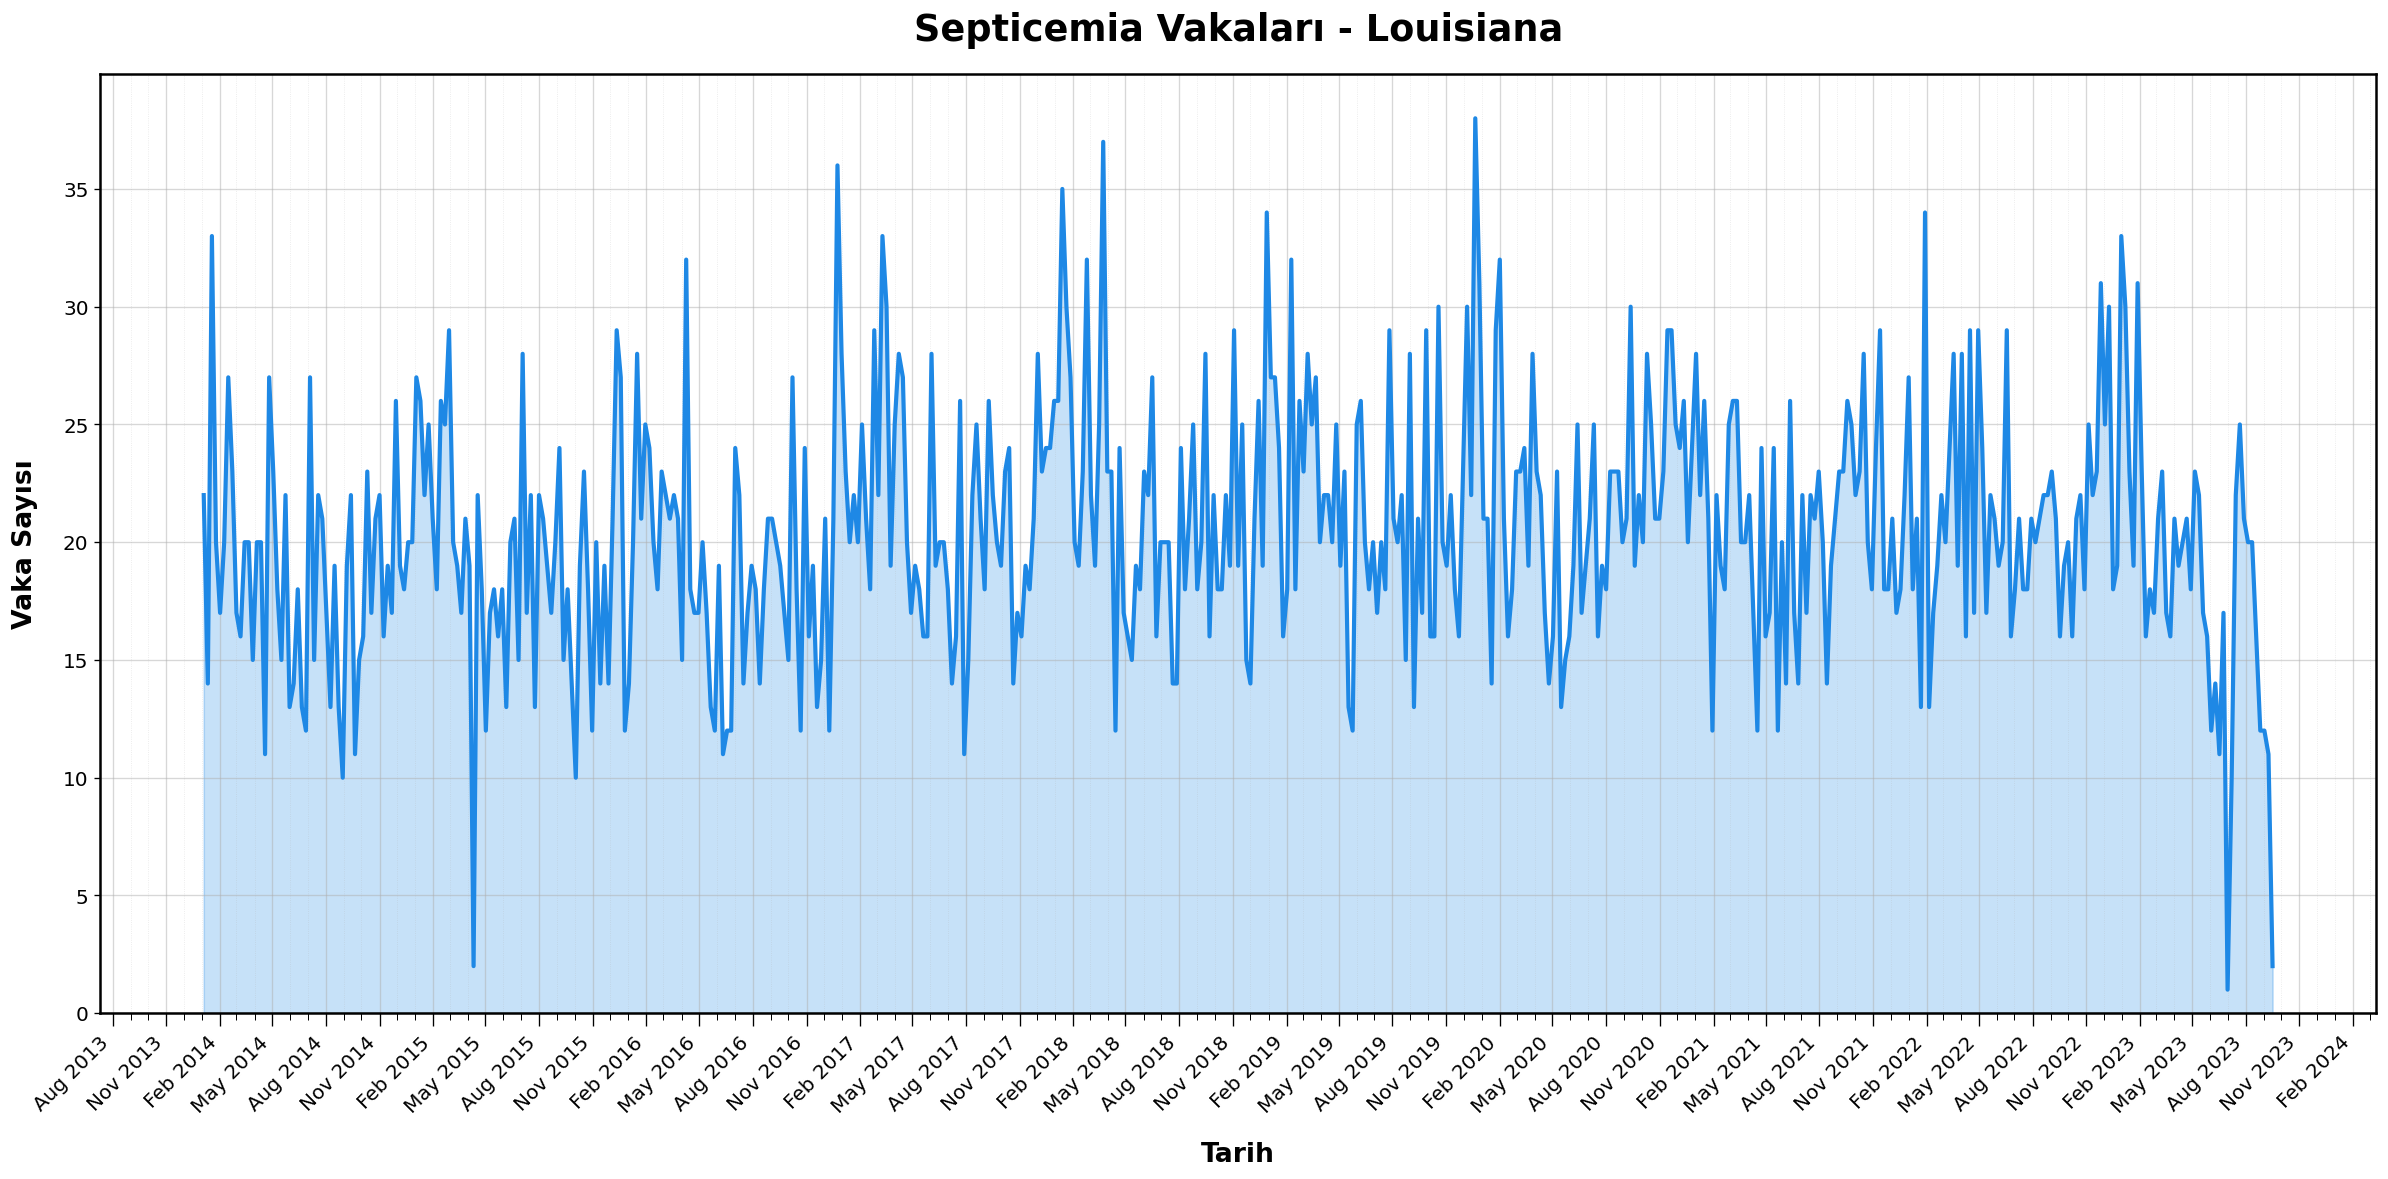

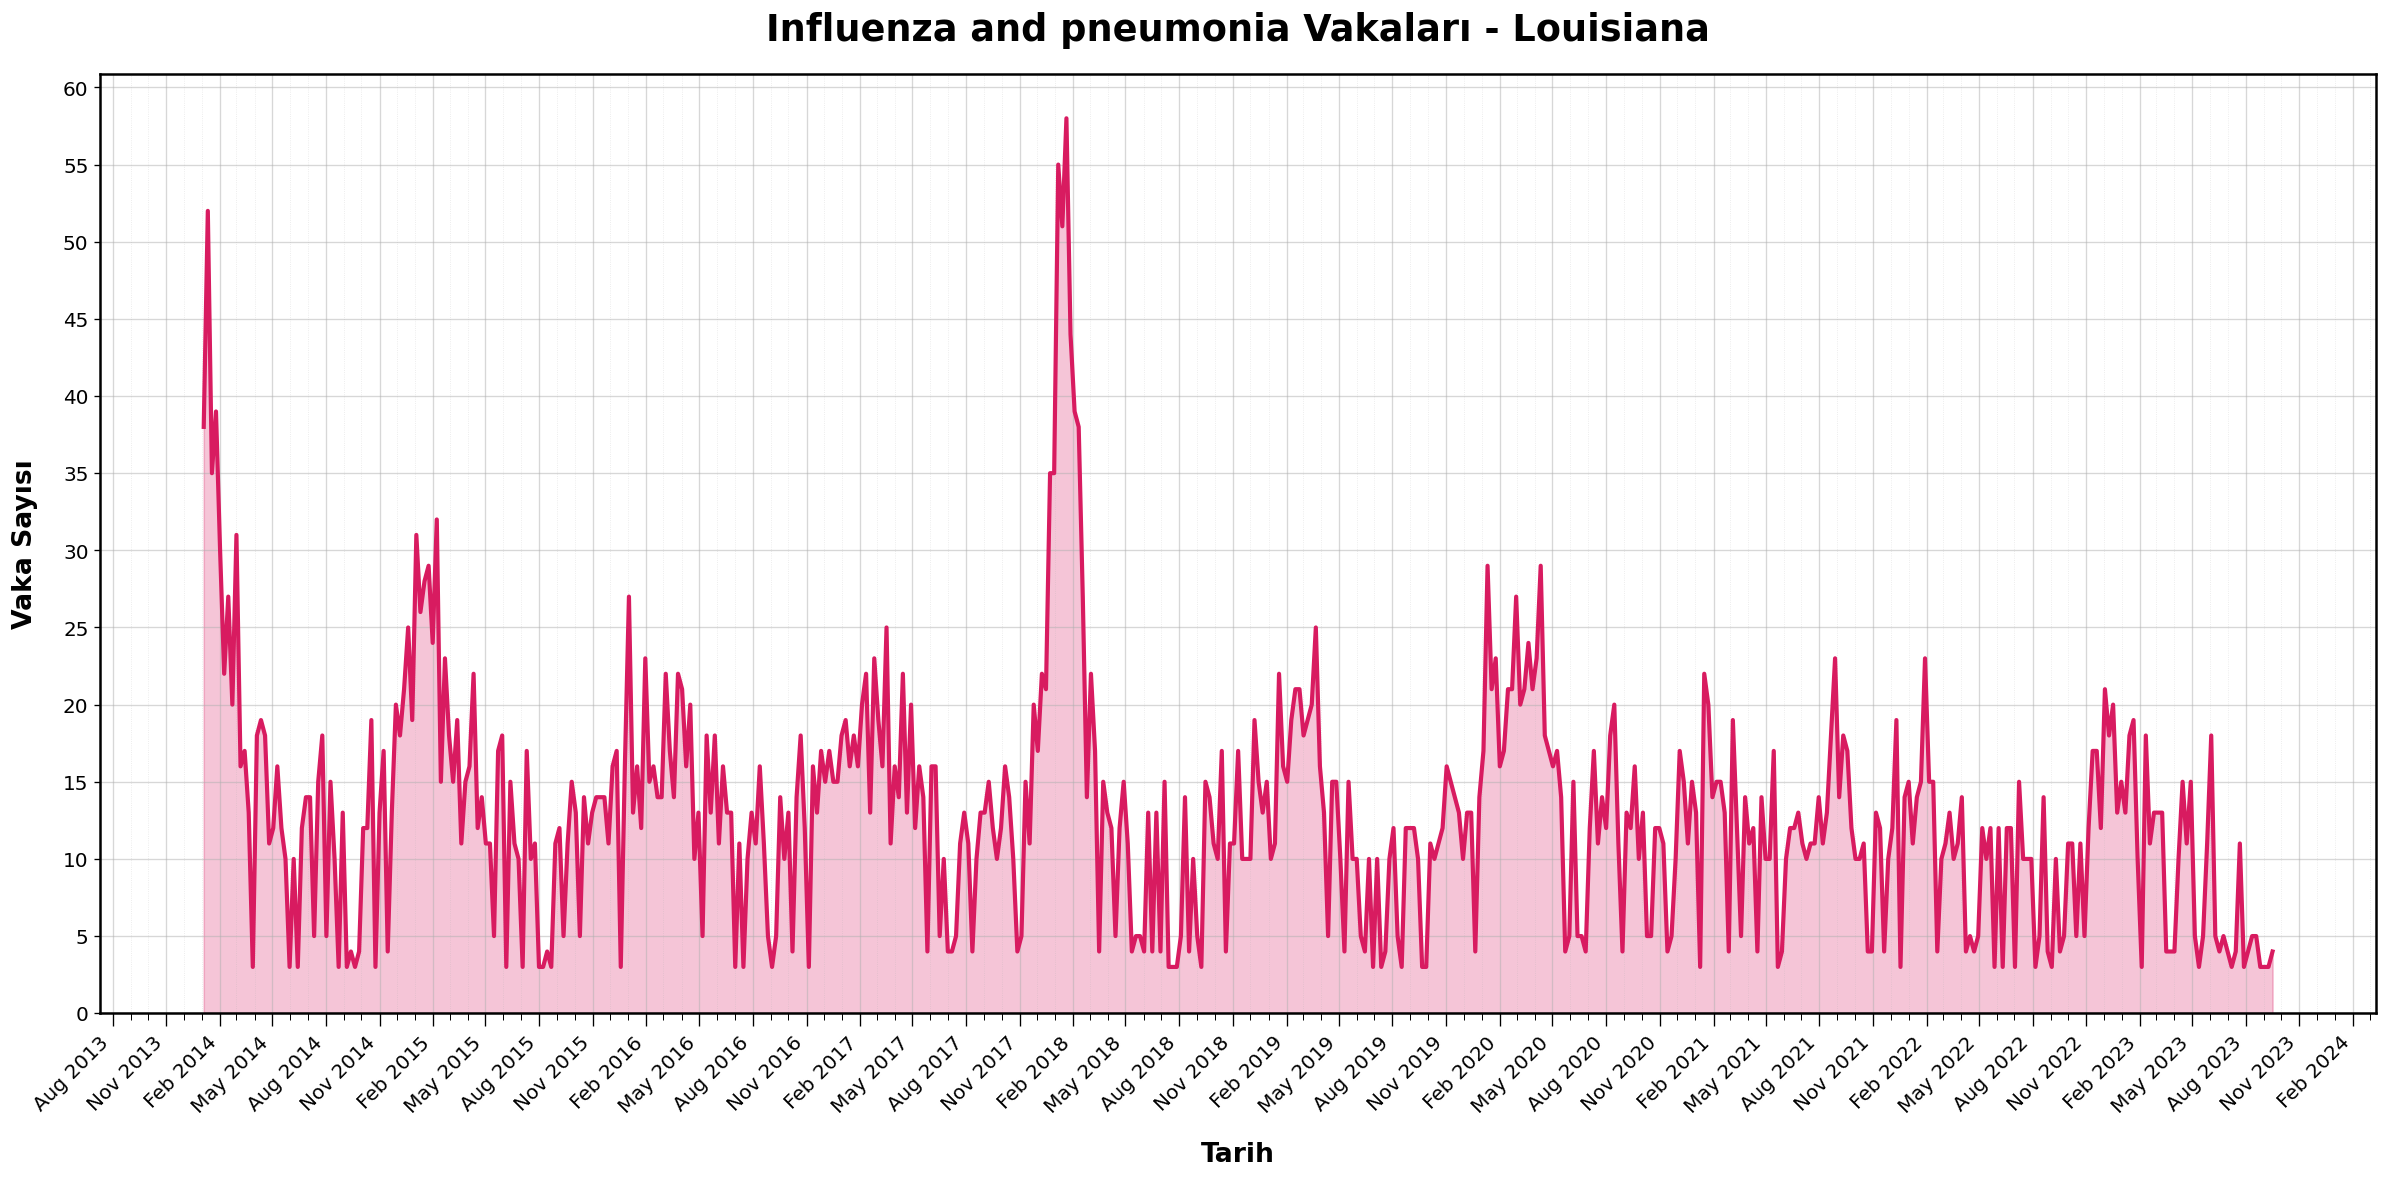

In [38]:
dfs = [filled_df_1, filled_df_2, filled_df_3, filled_df_4]
diseases = ['Septicemia', 'Influenza and pneumonia']
plot_all_diseases_for_dataframes(dfs, diseases)

In [39]:
import numpy as np
import pandas as pd
from scipy.ndimage import gaussian_filter1d
from scipy.stats import zscore

def smooth_outliers_in_dfs_for_multiple_diseases(dfs, diseases, sigma=2, z_threshold=2):
    """
    Birden fazla DataFrame üzerinde birden fazla hastalık ismi için aykırı değerleri tespit eder ve smoothing ile düzeltir.

    Parameters:
    - dfs: DataFrame listesi
    - diseases: Hastalık isimlerinin listesi
    - sigma: Gaussian smoothing parametresi (varsayılan 2)
    - z_threshold: Aykırı değerler için z-skoru eşiği (varsayılan 3)

    Returns:
    - smoothed_dfs: Smoothed (düzeltilmiş) DataFrame'lerin listesi
    """
    smoothed_dfs = []

    for df_idx, dataframe in enumerate(dfs):
        # Orjinal DataFrame'i kopyala
        df = dataframe.copy()
        jurisdiction = df['Jurisdiction of Occurrence'].iloc[0] if 'Jurisdiction of Occurrence' in df.columns else f"Dataset {df_idx}"
        print(f"İşleniyor: {jurisdiction}")

        # Mevcut sütunları kontrol et
        print(f"Mevcut sütunlar: {df.columns.tolist()}")

        # Her hastalık için
        for disease_name in diseases:
            # Hastalık adı DataFrame'de var mı kontrol et
            if disease_name not in df.columns:
                print(f"  - {disease_name} sütunu {jurisdiction} için bulunamadı")
                continue

            print(f"  - {disease_name} için smoothing uygulanıyor...")

            try:
                # Hastalık verilerini al
                counts = df[disease_name].copy()

                # NaN değerlerini doldur
                counts = counts.fillna(method='ffill').fillna(method='bfill').fillna(0)

                # En az 2 değer varsa işleme devam et
                if len(counts) > 2:
                    # Z-score hesapla
                    z_scores = zscore(counts)

                    # Aykırı değerleri tespit et
                    outliers = np.abs(z_scores) > z_threshold

                    # Smoothing işlemi uygula
                    smoothed_counts = gaussian_filter1d(counts.values, sigma=sigma)

                    # Aykırı değerleri smoothed değerlerle değiştir
                    counts[outliers] = smoothed_counts[outliers]

                    # DataFrame'e geri koy
                    df[disease_name] = counts

                    print(f"    ✓ Başarılı: {sum(outliers)} aykırı değer smoothing ile düzeltildi")
                else:
                    print(f"    ! {disease_name} için yeterli veri yok")

            except Exception as e:
                print(f"    ! {disease_name} için smoothing işleminde hata: {e}")

        # Smoothed DataFrame'i listeye ekle
        smoothed_dfs.append(df)

    return smoothed_dfs


In [40]:
print("Smoothing işlemi başlatılıyor...")
smoothed_dfs = smooth_outliers_in_dfs_for_multiple_diseases(dfs, diseases)

Smoothing işlemi başlatılıyor...
İşleniyor: Alabama
Mevcut sütunlar: ['Jurisdiction of Occurrence', 'Septicemia', 'Influenza and pneumonia']
  - Septicemia için smoothing uygulanıyor...
    ✓ Başarılı: 14 aykırı değer smoothing ile düzeltildi
  - Influenza and pneumonia için smoothing uygulanıyor...
    ✓ Başarılı: 33 aykırı değer smoothing ile düzeltildi
İşleniyor: Georgia
Mevcut sütunlar: ['Jurisdiction of Occurrence', 'Septicemia', 'Influenza and pneumonia']
  - Septicemia için smoothing uygulanıyor...
    ✓ Başarılı: 20 aykırı değer smoothing ile düzeltildi
  - Influenza and pneumonia için smoothing uygulanıyor...
    ✓ Başarılı: 22 aykırı değer smoothing ile düzeltildi
İşleniyor: Mississippi
Mevcut sütunlar: ['Jurisdiction of Occurrence', 'Septicemia', 'Influenza and pneumonia']
  - Septicemia için smoothing uygulanıyor...
    ✓ Başarılı: 24 aykırı değer smoothing ile düzeltildi
  - Influenza and pneumonia için smoothing uygulanıyor...
    ✓ Başarılı: 18 aykırı değer smoothing ile

C:\Users\HP\AppData\Local\Temp\ipykernel_3652\4091664996.py:44: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  counts = counts.fillna(method='ffill').fillna(method='bfill').fillna(0)
C:\Users\HP\AppData\Local\Temp\ipykernel_3652\4091664996.py:44: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  counts = counts.fillna(method='ffill').fillna(method='bfill').fillna(0)
C:\Users\HP\AppData\Local\Temp\ipykernel_3652\4091664996.py:44: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  counts = counts.fillna(method='ffill').fillna(method='bfill').fillna(0)
C:\Users\HP\AppData\Local\Temp\ipykernel_3652\4091664996.py:44: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill()

In [41]:
def plot_smoothed_diseases(smoothed_dfs, diseases, colors=None):
    """
    Smoothing işleminden sonra oluşan DataFrame'lerin hastalık verilerini plotlar.

    Parametreler:
        smoothed_dfs (list): Smoothing işleminden sonra oluşan DataFrame'lerin listesi
        diseases (list): Çizilecek hastalıkların listesi
        colors (list, optional): Kullanılacak renklerin listesi

    Dönüş:
        None: Fonksiyon herhangi bir değer döndürmez, grafikleri gösterir.
    """
    # Renk paleti oluştur
    if colors is None:
        colors = sns.color_palette("tab10", len(diseases))

    # Her DataFrame için
    for df_idx, df in enumerate(smoothed_dfs):
        # Eyalet adını al
        jurisdiction = df['Jurisdiction of Occurrence'].iloc[0] if 'Jurisdiction of Occurrence' in df.columns else f"Dataset {df_idx+1}"
        print(f"\n{jurisdiction} için hastalık grafikleri çiziliyor...")

        # Mevcut sütunları yazdır
        print(f"DataFrame sütunları: {df.columns.tolist()}")

        # Her hastalık için
        for disease_idx, disease_name in enumerate(diseases):
            # Hastalık adı DataFrame'de var mı kontrol et
            if disease_name not in df.columns:
                print(f"  - {disease_name}: Bu hastalık verisi {jurisdiction} için mevcut değil.")
                continue

            print(f"  - {disease_name} grafiği çiziliyor...")

            try:
                # Veri kontrolü
                if df[disease_name].isna().all():
                    print(f"    ! {disease_name} için tüm değerler NaN")
                    continue

                # Grafik oluştur
                plt.figure(figsize=(16, 8), dpi=100)

                # Tarih verisini hazırla
                if isinstance(df.index, pd.DatetimeIndex):
                    dates = df.index
                elif 'Week Ending Date' in df.columns:
                    dates = df['Week Ending Date']
                else:
                    dates = np.arange(len(df[disease_name]))
                    print("    ! Tarih verisi bulunamadı, indeks kullanılıyor")

                # Renk seç
                color = colors[disease_idx % len(colors)]

                # Grafiği çiz
                plt.plot(dates, df[disease_name], linewidth=2.5, color=color, label=disease_name)
                plt.fill_between(dates, df[disease_name], alpha=0.2, color=color)

                # Başlık ve etiketler
                plt.title(f"{disease_name} Vakaları - {jurisdiction}", fontsize=18, fontweight='bold', pad=15)
                plt.xlabel("Tarih", fontsize=14, fontweight='bold', labelpad=10)
                plt.ylabel("Vaka Sayısı", fontsize=14, fontweight='bold', labelpad=10)

                # Tarih formatı (eğer dates bir tarih serisi ise)
                if isinstance(dates, pd.DatetimeIndex) or isinstance(dates, pd.Series) and pd.api.types.is_datetime64_any_dtype(dates):
                    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
                    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
                    plt.xticks(rotation=45, ha='right', fontsize=10)

                # Izgara ve stil
                plt.grid(True, linestyle='--', alpha=0.7)
                plt.tight_layout()

                # Grafiği göster
                plt.show()
                print("    ✓ Grafik başarıyla çizildi")

            except Exception as e:
                print(f"    ! {disease_name} grafiği çizilirken hata: {e}")

    print("\nTüm grafik işlemleri tamamlandı.")


Grafikler çiziliyor...

Alabama için hastalık grafikleri çiziliyor...
DataFrame sütunları: ['Jurisdiction of Occurrence', 'Septicemia', 'Influenza and pneumonia']
  - Septicemia grafiği çiziliyor...


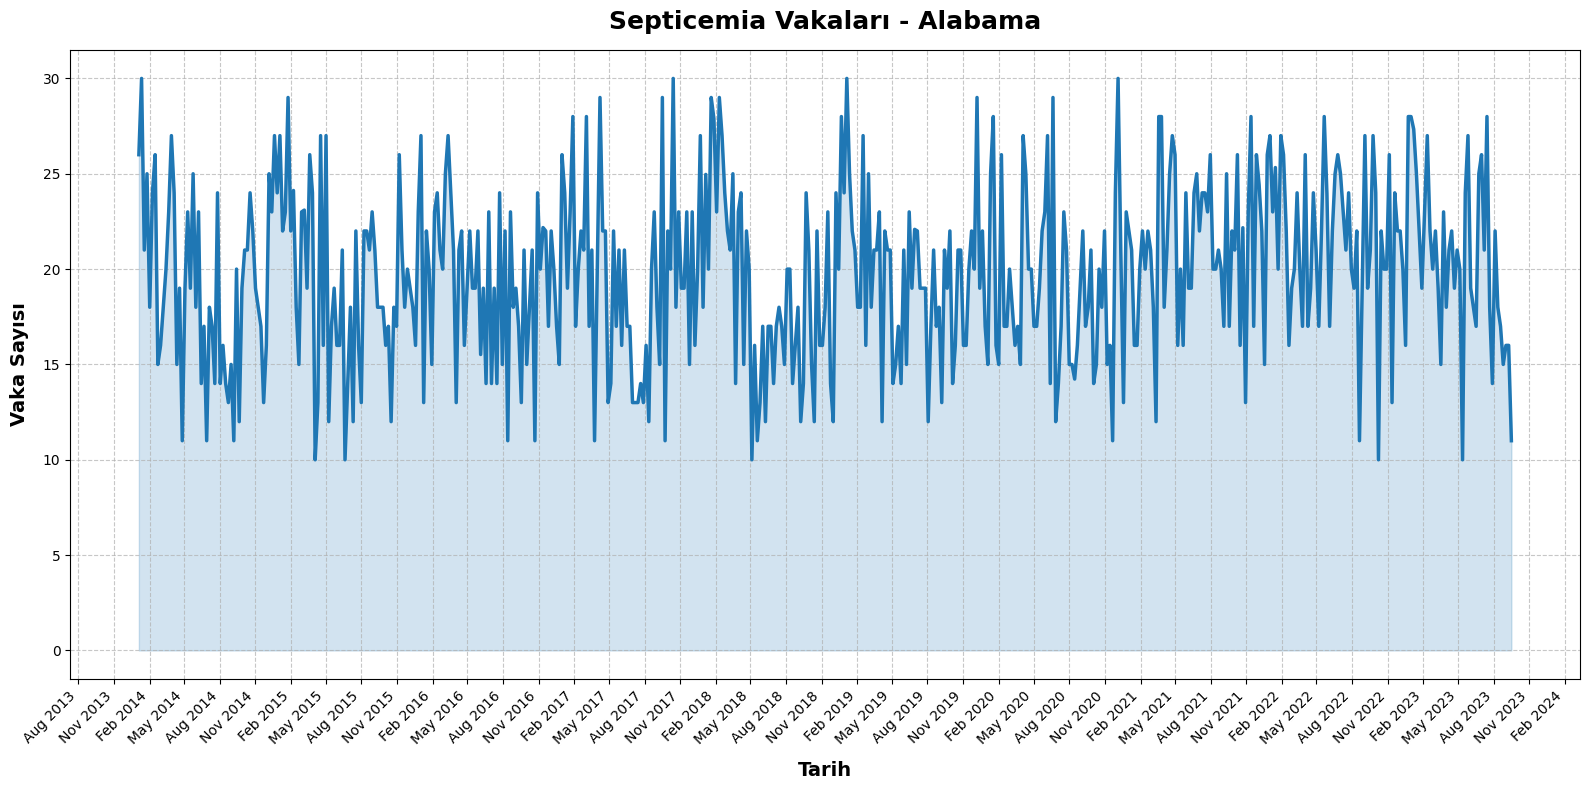

    ✓ Grafik başarıyla çizildi
  - Influenza and pneumonia grafiği çiziliyor...


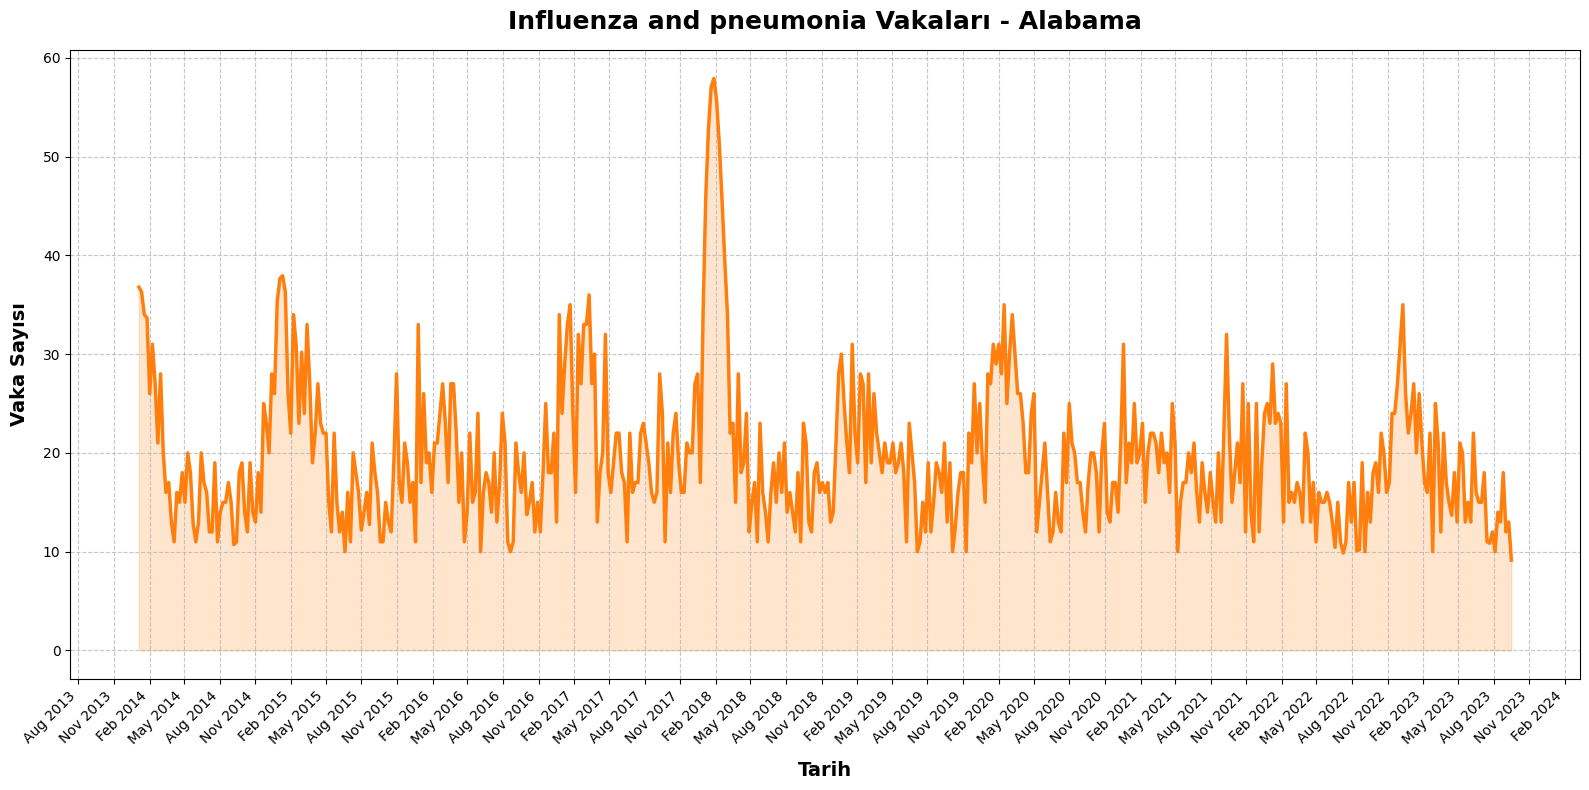

    ✓ Grafik başarıyla çizildi

Georgia için hastalık grafikleri çiziliyor...
DataFrame sütunları: ['Jurisdiction of Occurrence', 'Septicemia', 'Influenza and pneumonia']
  - Septicemia grafiği çiziliyor...


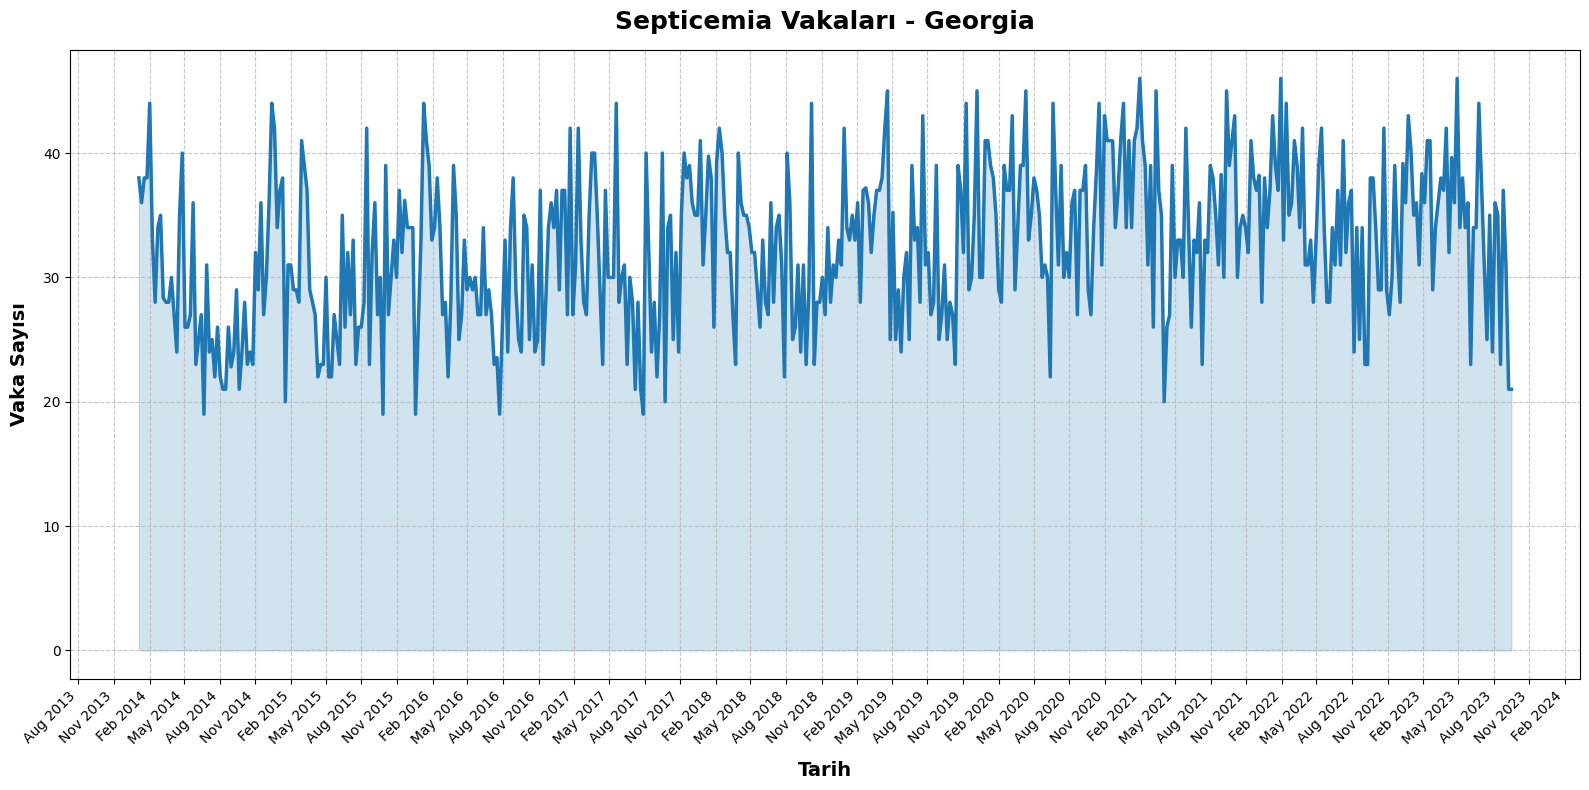

    ✓ Grafik başarıyla çizildi
  - Influenza and pneumonia grafiği çiziliyor...


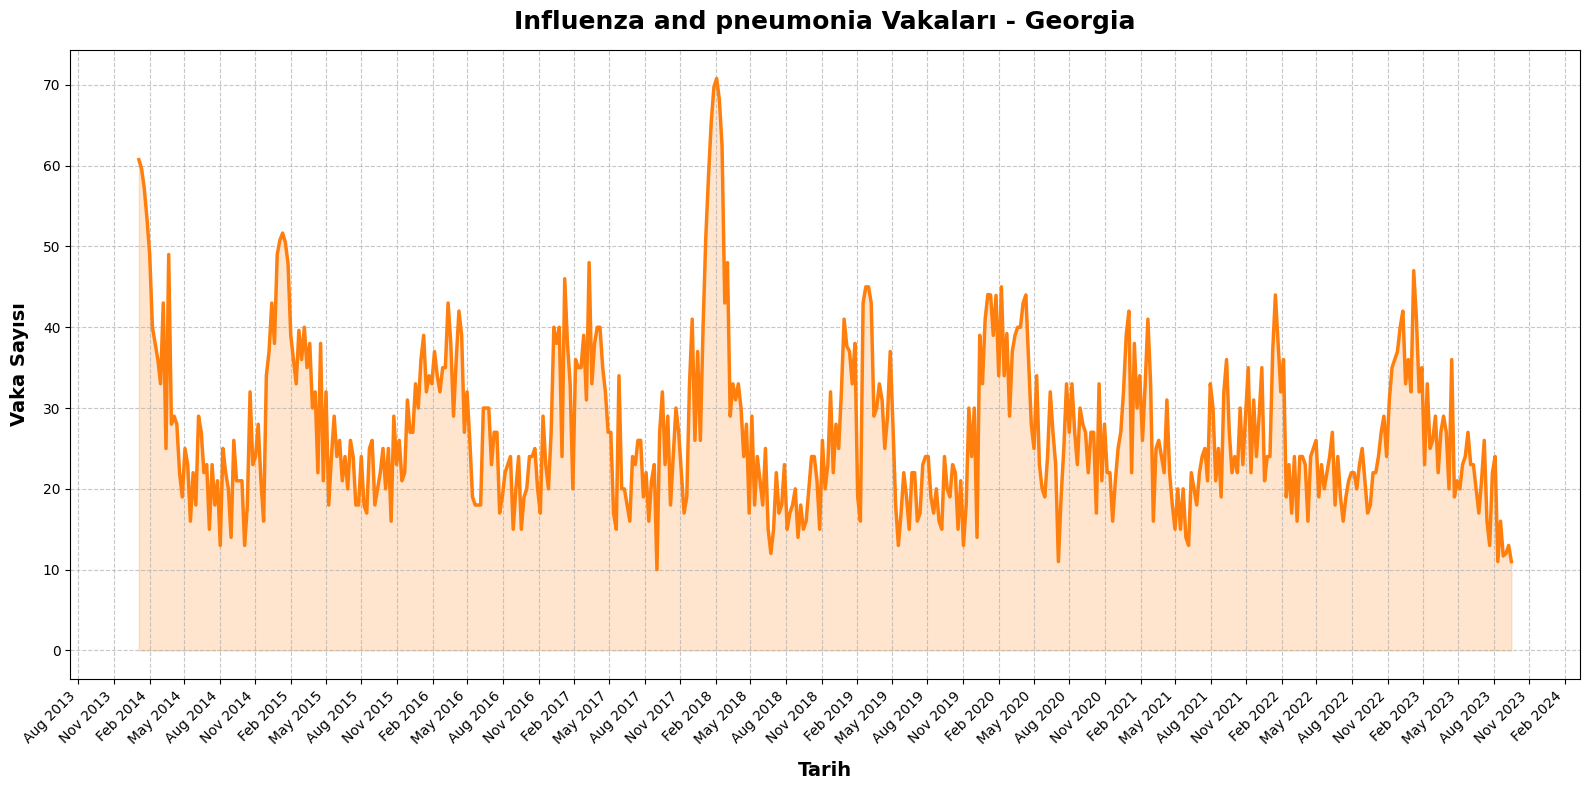

    ✓ Grafik başarıyla çizildi

Mississippi için hastalık grafikleri çiziliyor...
DataFrame sütunları: ['Jurisdiction of Occurrence', 'Septicemia', 'Influenza and pneumonia']
  - Septicemia grafiği çiziliyor...


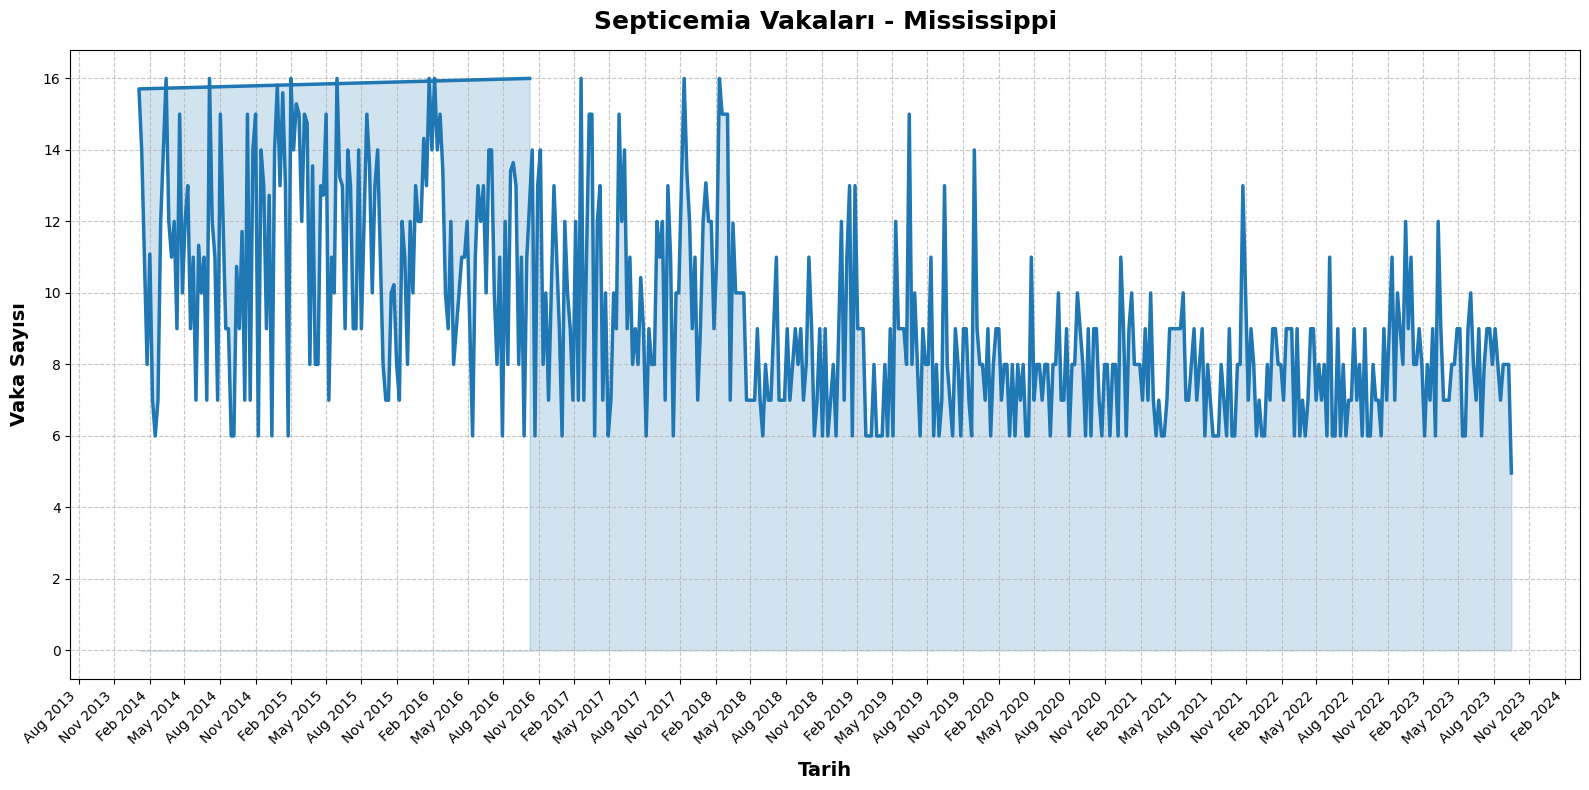

    ✓ Grafik başarıyla çizildi
  - Influenza and pneumonia grafiği çiziliyor...


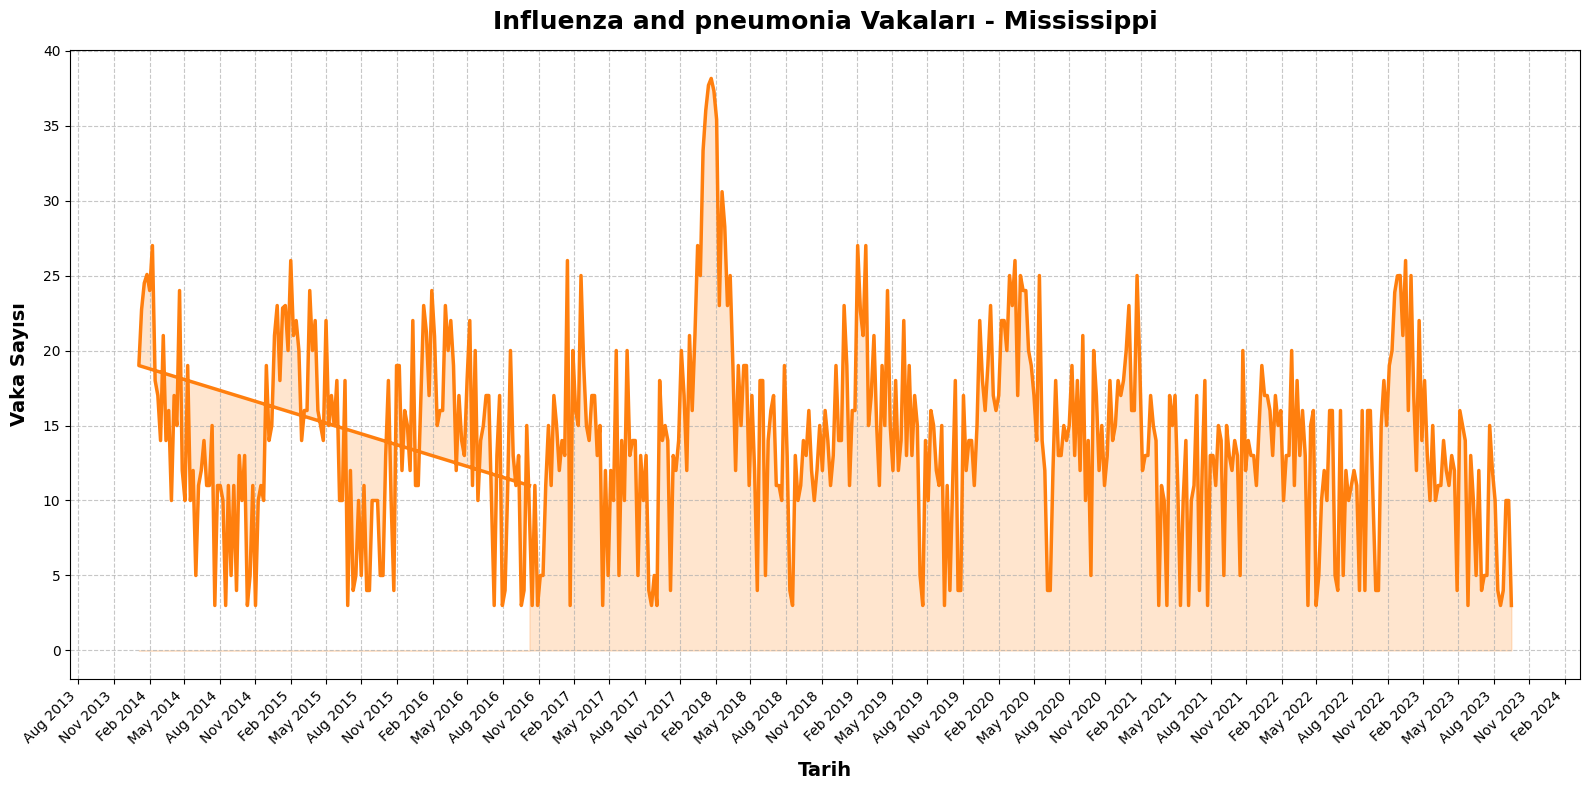

    ✓ Grafik başarıyla çizildi

Louisiana için hastalık grafikleri çiziliyor...
DataFrame sütunları: ['Jurisdiction of Occurrence', 'Septicemia', 'Influenza and pneumonia']
  - Septicemia grafiği çiziliyor...


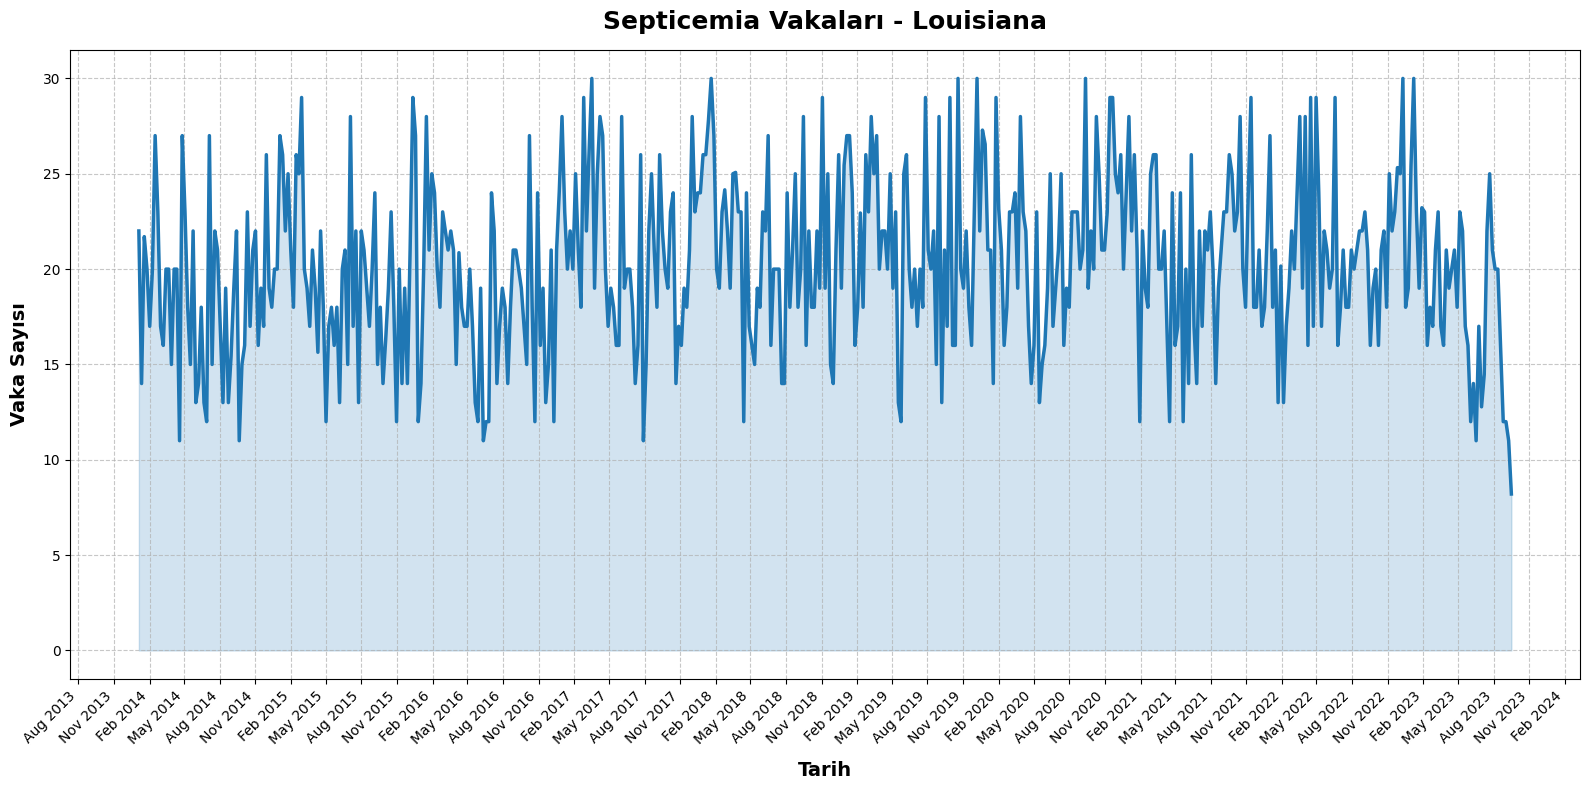

    ✓ Grafik başarıyla çizildi
  - Influenza and pneumonia grafiği çiziliyor...


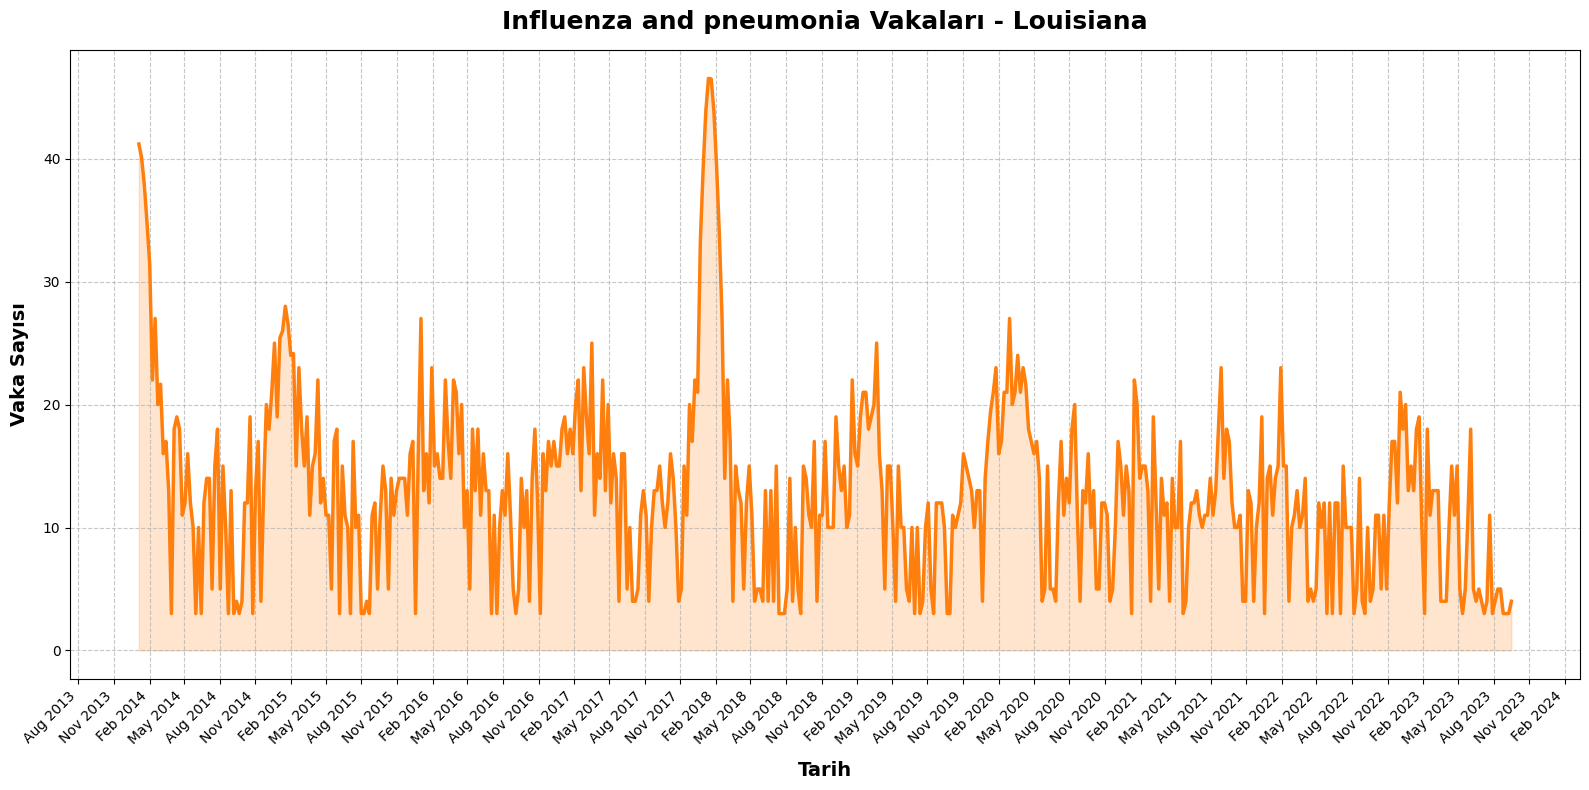

    ✓ Grafik başarıyla çizildi

Tüm grafik işlemleri tamamlandı.


In [42]:
print("\nGrafikler çiziliyor...")
plot_smoothed_diseases(smoothed_dfs, diseases)

In [55]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd

def forecast_cases_for_smooth_dfs(location, date, diseases, smooth_dfs, exog_column=None):
    """
    Smooth edilmiş DataFrame'ler üzerinde tahmin yapar.

    Parameters:
        location (str): Tahmin yapılacak eyalet.
        date (str): Tahmin yapılacak tarih.
        diseases (list): Tahmin yapılacak hastalıklar.
        smooth_dfs (list): Smooth edilmiş DataFrame'lerin listesi.
        exog_column (str, optional): Dışsal değişken sütunu.

    Returns:
        dict: Tahmin sonuçlarını içeren sözlük.
    """
    result = {location: {}}
    
    try:
        # İlgili eyaletin verisini smooth edilmiş DataFrame'lerden bul
        location_data = None
        for df in smooth_dfs:
            if location in df['Jurisdiction of Occurrence'].unique():
                location_data = df[df['Jurisdiction of Occurrence'] == location]
                break

        if location_data is None:
            raise ValueError(f"{location} için veri bulunamadı.")

        # Zaman indeksini kontrol et
        if not isinstance(location_data.index, pd.DatetimeIndex):
            raise ValueError("Veri çerçevesi zaman indeksli değil.")

        # Kullanıcıdan alınan hedef tarih
        date = pd.Timestamp(date)
        last_date = location_data.index[-1]

        # Eğer tarih geçmişte veya veri setindeki tarihlerle aynıysa tahmin yapma
        if date <= last_date:
            print("Seçilen tarih geçmişte veya verinin içinde, tahmin gerekmez.")
            return result

        # Kaç hafta ileriye tahmin yapılacak?
        delta_weeks = ((date - last_date).days) // 7
        if delta_weeks < 1:
            delta_weeks = 1  # En az 1 hafta

        for disease in diseases:
            if disease not in location_data.columns:
                result[location][disease] = "Veri yok"
                continue

            # Veri noktalarını al ve NaN değerleri kaldır
            y = location_data[disease].dropna()

            if len(y) > 2:
                if exog_column and exog_column in location_data.columns:
                    # Exogenous veriyi al ve NaN değerleri kaldır
                    X = location_data[exog_column].dropna()
                    common_index = y.index.intersection(X.index)
                    y = y.loc[common_index]
                    X = X.loc[common_index]

                    # SARIMAX modeli ile tahmin yap
                    model = SARIMAX(y, order=(2, 1, 2), seasonal_order=(1, 1, 1, 52))
                    model_fit = model.fit(disp=False)

                    # Gelecekteki exog verisi tahmin edilemiyorsa None verebiliriz
                    forecast = model_fit.forecast(steps=delta_weeks, exog=None)
                else:
                    # Dışsal değişken kullanmadan SARIMAX modelini oluştur
                    model = SARIMAX(y, order=(1, 1, 1))
                    model_fit = model.fit(disp=False)
                    forecast = model_fit.forecast(steps=delta_weeks)

                # Son adım tahminini al
                forecast_value = round(forecast.iloc[-1])
                result[location][disease] = int(forecast_value)
            else:
                result[location][disease] = "Yeterli veri yok"

    except Exception as e:
        print(f"Hata oluştu: {type(e).__name__} - {e}")
        result[location] = "Tahmin yapılamadı"

    return result

In [56]:
# Örnek kullanım
forecast_results_smooth = forecast_cases_for_smooth_dfs(
    location=state,
    date=selected_date,
    diseases=diseases,
    smooth_dfs=smoothed_dfs
)

print("Tahmin Sonuçları (Smooth Edilmiş Veriler):")
print(forecast_results_smooth)

Tahmin Sonuçları (Smooth Edilmiş Veriler):
{'Alabama': {'Septicemia': 17, 'Influenza and pneumonia': 11}}


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)


In [57]:
def forecast_cases_for_smooth_dfs(location, date, diseases, smooth_dfs, exog_column=None):
    result = {location: {}}
    
    try:
        # İlgili eyaletin verisini smooth edilmiş DataFrame'lerden bul
        location_data = None
        for df in smooth_dfs:
            if location in df['Jurisdiction of Occurrence'].unique():
                location_data = df[df['Jurisdiction of Occurrence'] == location]
                break

        if location_data is None:
            raise ValueError(f"{location} için veri bulunamadı.")

        # Zaman indeksini kontrol et
        if not isinstance(location_data.index, pd.DatetimeIndex):
            raise ValueError("Veri çerçevesi zaman indeksli değil.")

        date = pd.Timestamp(date)
        last_date = location_data.index[-1]

        if date <= last_date:
            print("Seçilen tarih geçmişte veya verinin içinde.")
            return result

        # Haftalık tahmin sayısını hesapla
        weeks_to_forecast = ((date - last_date).days) // 7
        if weeks_to_forecast < 1:
            weeks_to_forecast = 1

        for disease in diseases:
            if disease not in location_data.columns:
                result[location][disease] = {"values": [], "dates": []}
                continue

            y = location_data[disease].dropna()

            if len(y) > 2:
                # SARIMAX modeli ile tahmin yap
                model = SARIMAX(y, order=(2, 1, 2), seasonal_order=(1, 1, 1, 52))
                model_fit = model.fit(disp=False)
                
                # Tüm tahmin değerlerini al
                forecast = model_fit.forecast(steps=weeks_to_forecast)
                
                # Tahmin tarihlerini oluştur
                forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=7), 
                                            periods=weeks_to_forecast, 
                                            freq='W')
                
                # Sonuçları kaydet
                result[location][disease] = {
                    "values": forecast.values.tolist(),
                    "dates": forecast_dates.tolist()
                }
            else:
                result[location][disease] = {"values": [], "dates": []}

    except Exception as e:
        print(f"Hata oluştu: {type(e).__name__} - {e}")
        result[location] = "Tahmin yapılamadı"

    return result

def plot_actual_vs_predicted_for_smooth_dfs(smooth_dfs, disease, target_date, location, forecast_results):
    try:
        # İlgili eyaletin verisini smooth edilmiş DataFrame'lerden bul
        location_data = None
        for df in smooth_dfs:
            if location in df['Jurisdiction of Occurrence'].unique():
                location_data = df[df['Jurisdiction of Occurrence'] == location]
                break

        if location_data is None:
            print(f"{location} için veri bulunamadı.")
            return

        dates = location_data.index
        actual_values = location_data[disease]

        if len(dates) == 0 or len(actual_values) == 0:
            print("Seçilen eyalet ve hastalık için veri yok.")
            return

        # Tahmin değerlerini al
        predictions = forecast_results[location][disease]
        forecast_dates = predictions["dates"]
        forecast_values = predictions["values"]

        # Grafiği çiz
        plt.figure(figsize=(15, 7))
        
        # Gerçek değerler
        plt.plot(dates, actual_values, label="Gerçek Değerler", color="blue", linewidth=2)
        
        # Tahmin değerleri
        plt.plot(forecast_dates, forecast_values, label="Tahmin Edilen Değerler", 
                color="red", linestyle="--", linewidth=2)
        
        # Tahmin aralığını gölgele
        plt.fill_between(forecast_dates, 
                        [max(0, val * 0.8) for val in forecast_values],
                        [val * 1.2 for val in forecast_values],
                        color="red", alpha=0.2)
        
        plt.title(f"{location} - {disease}\nGerçek ve Tahmin Edilen Değerler", 
                 fontsize=16, pad=20)
        plt.xlabel("Tarih", fontsize=12)
        plt.ylabel("Vaka Sayısı", fontsize=12)
        
        plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
        plt.xticks(rotation=45, ha='right')
        
        plt.grid(True, linestyle="--", alpha=0.6)
        plt.legend(fontsize=10)
        
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Grafik oluşturulurken hata oluştu: {str(e)}")

In [58]:
selected_date = pd.Timestamp(selected_date)

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA paramete

Tahmin Sonuçları (Smooth Edilmiş Veriler):
{'Alabama': {'Septicemia': {'values': [22.280332390169495, 19.802497641830413, 18.676313501487655, 20.218370063863304, 20.992061301553655, 19.986804486784273, 21.246987006007693, 19.876564064479343, 18.940915301204445, 22.531359499467683, 23.84106851798494, 21.262655746992905, 20.944235904163495, 25.625534647602393, 25.104975950574463, 24.117078960539956, 25.35046883197549, 21.75166187544962, 21.889249549036407, 24.25809019928894, 22.828109830162365, 20.935341603181875, 22.917642938484803, 21.23793575197425, 21.95790461853618, 20.459229744781233, 21.003022847504816, 21.092726626887053, 22.115840246762556, 20.628168074089047, 21.75301510063771, 19.376355906411593, 19.060748703461154, 18.265086487761728, 20.870032486224783, 22.3185303780685, 19.466663873503776, 18.235958494649843, 20.33666644063537, 20.34796472739747, 20.424428540169245, 19.749701002041277, 22.73254009701553, 18.571838949045855, 18.924417331237972, 18.674266762233188, 19.5663634

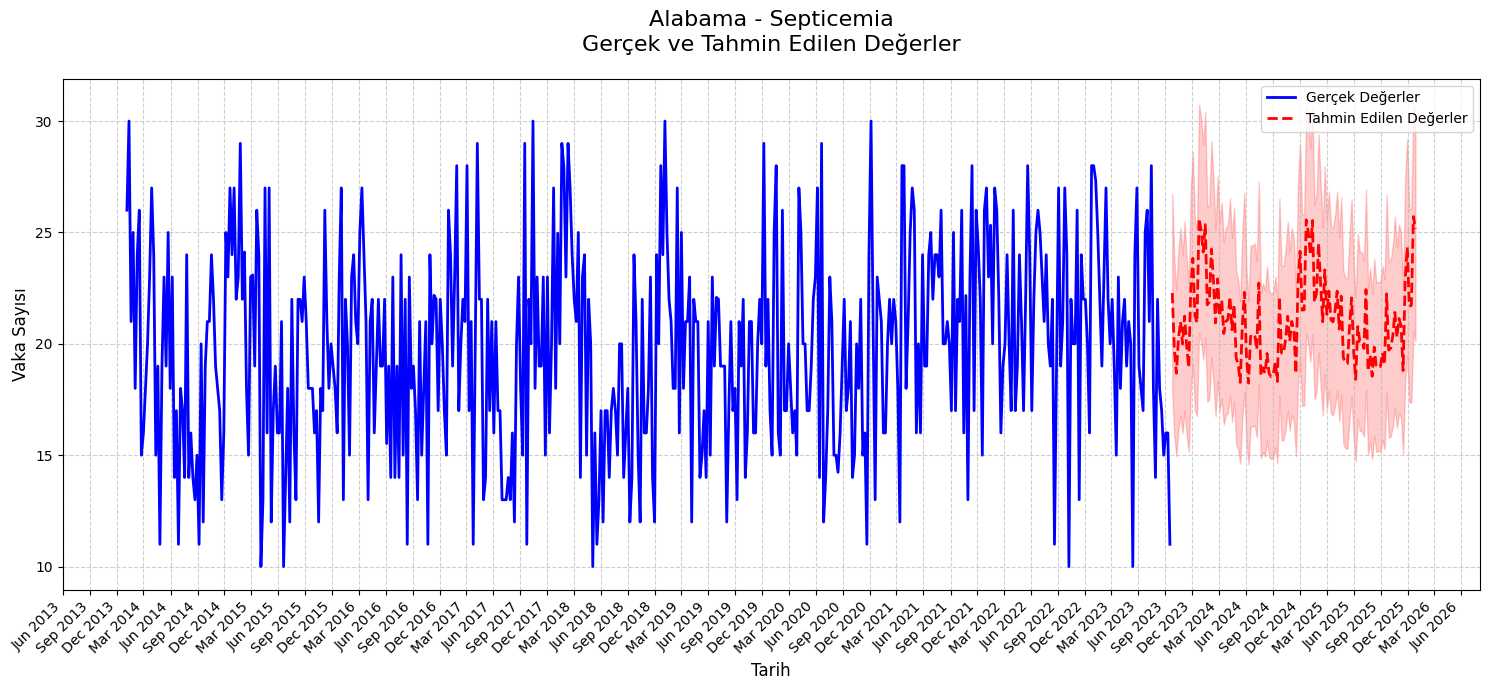

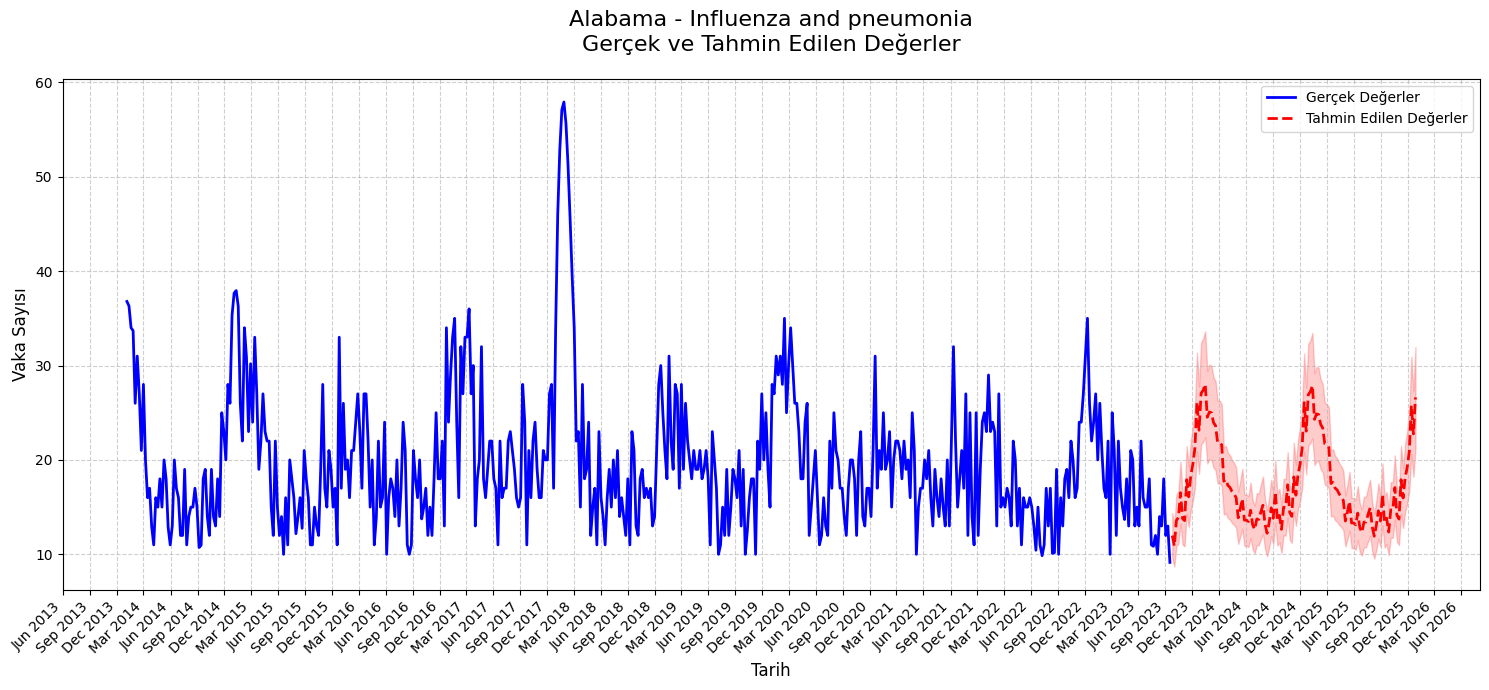

In [59]:
# Tahmin yapmak için gerekli parametreler
location = "Alabama"  # Tahmin yapılacak eyalet
target_date = "2026-01-01"  # Tahmin yapılacak tarih
diseases_to_forecast = ["Septicemia", "Influenza and pneumonia"]  # Tahmin yapılacak hastalıklar

# Smooth edilmiş DataFrame'ler üzerinde tahmin yap
forecast_results_smooth_example = forecast_cases_for_smooth_dfs(
    location=location,
    date=target_date,
    diseases=diseases_to_forecast,
    smooth_dfs=smoothed_dfs
)

# Tahmin sonuçlarını yazdır
print("Tahmin Sonuçları (Smooth Edilmiş Veriler):")
print(forecast_results_smooth_example)

# Tahmin edilen ve gerçek değerleri karşılaştıran grafikler oluştur
for disease in diseases_to_forecast:
    plot_actual_vs_predicted_for_smooth_dfs(
        smooth_dfs=smoothed_dfs,
        disease=disease,
        target_date=target_date,
        location=location,
        forecast_results=forecast_results_smooth_example
    )

In [61]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def evaluate_sarimax_model(dataframe, location, disease, forecast_steps=10):
    """
    SARIMAX modelinin doğruluğunu hesaplar.

    Parameters:
        dataframe (pd.DataFrame): Veri çerçevesi.
        location (str): Eyalet adı.
        disease (str): Hastalık adı.
        forecast_steps (int): İleriye dönük tahmin adım sayısı.

    Returns:
        dict: MAE ve RMSE değerlerini içeren bir sözlük.
    """
    try:
        # Seçilen yerin verilerini filtrele
        location_data = dataframe[dataframe['Jurisdiction of Occurrence'] == location]

        # Hastalık verisini al ve NaN değerleri kaldır
        data = location_data[disease].dropna()

        # SARIMAX modeli için en az 3 veri noktası gerekir
        if len(data) <= forecast_steps + 2:
            print(f"Yeterli veri yok: {len(data)} veri noktası mevcut.")
            return None

        # Eğitim ve test verilerini ayır
        train_data = data[:-forecast_steps]
        test_data = data[-forecast_steps:]

        # SARIMAX modelini oluştur ve eğit
        model = SARIMAX(train_data, order=(1, 1, 1))
        model_fit = model.fit(disp=False)

        # Tahmin yap
        forecast = model_fit.forecast(steps=forecast_steps)

        # Hata metriklerini hesapla
        mae = mean_absolute_error(test_data, forecast)
        rmse = np.sqrt(mean_squared_error(test_data, forecast))

        return {"MAE": mae, "RMSE": rmse}

    except Exception as e:
        print(f"Hata oluştu: {type(e).__name__} - {e}")
        return None

# Örnek kullanım
accuracy_results = evaluate_sarimax_model(
    dataframe=copy_merged,
    location=state,
    disease='Influenza and pneumonia',
    forecast_steps=10
)

if accuracy_results:
    print("SARIMAX Model Doğruluk Sonuçları:")
    print(f"MAE: {accuracy_results['MAE']}")
    print(f"RMSE: {accuracy_results['RMSE']}")

SARIMAX Model Doğruluk Sonuçları:
MAE: 3.1967654892999717
RMSE: 3.5124336755596866


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version

In [62]:
def generate_storytelling(llm, deaths_dict):
    """
    Parameters:
        llm (ChatOpenAI): LLM modeli.
        deaths_dict (dict): Ölüm sayılarının bulunduğu dictionary.

    Returns:
        str: Oluşturulan metin.
    """
    prompt = f"""
    Sen bir sağlık veri uzmanısın. Aşağıda, 2 haftalık bir tatil sırasında ziyaret edilen eyaletlerdeki ölüm sayıları verilmiştir.
    Verileri kullanarak kullanıcıya kısa, açıklayıcı ve akıcı bir metin oluştur.

    Ölüm sayıları:
    {deaths_dict}

    Metin Türkçe olacak şekilde yazılmalı ve istatistikleri sade bir dille anlatmalıdır.
    """
    try:
        response = llm.invoke(prompt).content
        return response
    except Exception as e:
        print(f"Hata oluştu: {e}")
        return "Metin oluşturulamadı."

# Örnek kullanım
deaths_dict = forecast_results  # Örneğin, forecast_results dictionary'sini kullanıyoruz
story = generate_storytelling(llm, deaths_dict)
print(story)

İki haftalık tatil sırasında Alabama eyaletinde toplam 30 ölüm gerçekleşti. Bu ölümlerden 17'si septisemi (kan zehirlenmesi) nedeniyle, 13'ü ise grip ve zatürre gibi solunum yolu enfeksiyonlarından kaynaklandı. Bu veriler, sağlık açısından dikkat edilmesi gereken önemli noktaları gösteriyor.
